**Классификации методик лечения третьей стадии рака легких (НМИЦ профилактической медицины)**

Алексей Козлов 2023.11.01 - 2023.11.08 (09-я неделя).

# Техническое Задание

**Техническое Задание (ТЗ) на разработку нейронной сети для классификации методик лечения рака легких на основе обследований:**

1. Введение:

   Задача заключается в разработке нейронной сети для классификации методик лечения третьей стадии рака легких на основе результатов обследований. Сеть должна предсказывать как метод лечения, так и уверенность доктора в диагнозе и выбранной методике лечения.

2. Требования к модели:

   - Разработать многоклассовую нейронную сеть для классификации методик лечения на основе параметров обследования.
   - Сеть должна иметь возможность предсказывать не только класс методики лечения, но и уровень уверенности доктора в диагнозе и выбранной методике лечения.
   - Модель должна принимать на вход результаты обследования и возвращать вероятности принадлежности к каждому классу методики лечения и уверенность доктора.

3. Данные:

   - Имеется таблица с 248 833 обследованиями третьей стадии рака легких.
   - Для каждого обследования представлены параметры, такие как биомаркеры, клинические данные и результаты тестов.

4. Архитектура сети:

   - Разработать архитектуру нейронной сети, включая входной слой, скрытые слои и выходной слой.
   - Использовать функции активации, например, ReLU для скрытых слоев и Softmax для выходного слоя.

5. Функциональность модели:

   Модель должна принимать на вход параметры обследования и возвращать:
    - Вектор вероятностей принадлежности к каждому классу методики лечения.
    - Значение уверенности доктора в диагнозе и выбранной методике лечения.

6. Обучение и оценка:

   - Разделить данные на обучающую, валидационную и тестовую выборки.
   - Выбрать функцию потерь для классификации и уверенности, например, категориальную перекрестную энтропию (Categorical Cross-Entropy) и среднеквадратичную ошибку (MSE) соответственно.
   - Выбрать оптимизатор для обучения, например, Adam.
   - Обучить модель на обучающей выборке и настроить гипер параметры с использованием валидационной выборки.
   - Оценить производительность модели на тестовой выборке с помощью метрик классификации и рассчитать уровень уверенности.

7. Интерфейс и использование:

   - Разработать интерфейс для ввода результатов обследования.
   - Реализовать функции, которые будут принимать введенные данные, подавать их на вход модели и возвращать предсказанный класс методики лечения и уровень уверенности.

8. Требования к реализации:

   - Использовать подходящий фреймворк для глубокого обучения, например, TensorFlow или PyTorch.
   - Предоставить исходный код модели, обучающий код, скрипты для оценки и тестирования.

9. Дополнительные требования:

   - Обеспечить возможность обновления модели с учетом новых данных и методов лечения.
   - Обеспечить документацию по использованию модели и интерфейса.

10. Заключение:

   - Разработка нейронной сети для классификации методик лечения третьей стадии рака легких должна удовлетворять указанным требованиям и обеспечивать точные и надежные результаты классификации и уверенности доктора.

# Импорт библиотек

In [1]:
# Загрузка файлов из облака
# import gdown
# Библиотека для работы с массивами данных
import numpy as np
# Библиотека для обработки и анализа данных
import pandas as pd
# Библиотека для построения графиков
import matplotlib.pyplot as plt
# Команда для отображения графики в ячейках среды Google Colaboratory
%matplotlib inline
# Библиотека для построения графиков
import seaborn as sns
import math
import re
import os.path

# from IPython.display import clear_output
# Для работы с датами
from datetime import datetime


# Подключение класса создания модели Sequential
# Sequential – модуль для создания последовательной модели нейронной сети
from tensorflow.keras.models import Sequential, Model
# Подключение класса Dense - полносвязный слой
# Dense – линейный (полносвязный) слой. Из таких слоев будет создана ваша нейросеть
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten
# utils – модуль с полезными инструментами для подготовки данных
#Используем для to_categoricall
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam,Adadelta,SGD,Adagrad,RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
# подключаем колбэки
from tensorflow.keras.callbacks import LambdaCallback

from sklearn.preprocessing import StandardScaler
# Для разбивки на выборки
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('Библиотеки загружены!')

Библиотеки загружены!


# Загрузка датасета

In [3]:
#~ загрузка файла датасета lung_cancer -> рак легких
url2 = 'c:/LungCancer_AIConsultant/data_in/original_xlsx/lung_cancer_immunotherapy.xlsx'
#~ чтение данных из файла excel в pandas.DataFrame
df1 = pd.read_excel(url2)

In [4]:
#~ размеры датафрейма и количество пропусков
print(f'размеры датафрейма df1: {df1.shape}')
print(f'  число строк: {df1.shape[0]}')
print(f'  число колонок: {df1.shape[1]}')
print('='*50)
nan_cell_count = df1.isna().sum().sum()
nan_cell_count_proc = nan_cell_count*100/df1.size
print(f'общее количество пропусков во всей таблице (колонка цех): {nan_cell_count}, {round(nan_cell_count_proc, 2)}%')

размеры датафрейма df1: (248832, 21)
  число строк: 248832
  число колонок: 21
общее количество пропусков во всей таблице (колонка цех): 0, 0.0%


In [5]:
#~ выведем информацию о заполненности ячеек каждого признака и типе данных
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248832 entries, 0 to 248831
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count   Dtype 
---  ------                                                    --------------   ----- 
 0   id_ответа                                                 248832 non-null  int64 
 1   Раса                                                      248832 non-null  object
 2   Пол                                                       248832 non-null  object
 3   Возраст                                                   248832 non-null  object
 4   Статус курения                                            248832 non-null  object
 5   ECOG                                                      248832 non-null  object
 6   Есть опухолевая нагрузка? (симптомная опухоль)            248832 non-null  object
 7   Ко-мутации KRAS                                           248832 non-null  object
 8   Ко-мутации p53

In [6]:
df1.head(3)

,id_ответа,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,...,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий
0,1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
1,2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,от 43 до 60 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
2,3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,более 61 дня,нет мутаций,Не исследовался,Результативность лечения,Наблюдение,False,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...


In [7]:
# Создаю список названий колонок датасета, для дальнейшего использования
df1_colnames = df1.columns.tolist()
# print(f'названия колонок: {len(df1_colnames)}: {df1_colnames}')

colnames_count = len(df1_colnames)
for i in range(colnames_count):
  i_elem = df1_colnames[i]
  print(f"{i}->{colnames_count}: '{i_elem}'")

0->21: 'id_ответа'
1->21: 'Раса'
2->21: 'Пол'
3->21: 'Возраст'
4->21: 'Статус курения'
5->21: 'ECOG'
6->21: 'Есть опухолевая нагрузка? (симптомная опухоль)'
7->21: 'Ко-мутации KRAS'
8->21: 'Ко-мутации p53.'
9->21: 'Ко-мутации STK11'
10->21: 'Ко-мутации KEAP1'
11->21: 'Срок от окончания ХЛТ'
12->21: 'Молекулярный статус (только для неплоскоклеточного рака)'
13->21: 'PD-L1 статус'
14->21: 'Предпочтение пациента по ответу на терапию'
15->21: 'Ответ эксперта (Лактионов)'
16->21: 'Поставьте галочку, если уверены на 100%'
17->21: 'Если 75%'
18->21: 'Если 50%'
19->21: 'Альтернатива, если 50% - обязательно'
20->21: 'Комментарий'


# Проверка балансировки

In [8]:
def print_column_info(df, col_name):
  '''
  Функция отображение иформации по данным колонки

  Args:
    df - pandas.DataFrame
    col_name - column_name название колонки

  Returns:
    отображение иформации
  '''

  #~~~~~~~~~~~~~~~~~~~~~~~~
  print()
  print('~'*150)
  col_inx = df.columns.get_loc(col_name)

  print(f"Колонка №{col_inx}: '{col_name}'")
  print('~'*50)
  # строки с пустыми значениями
  nan_values = df[df[col_name].isnull()].index
  print(f'число строк с пустыми значениями: {len(nan_values)}')

  #~~~~~~~~~~~~~~~~~~~~~~~~
  # строки с уникальными значениями unique_values
  unique_values = df[col_name].unique().tolist()
  unique_count = len(unique_values)
  print(f'число уникальных значений: {unique_count}')
  # print(f'    {unique_values}')

  #~~~~~~~~~~~~~~~~~~~~~~~~
  #создаем массив count_array из нулей по количеству уникальных значений
  count_array = np.zeros(unique_count, dtype=int)
  #val - value
  #inx - index
  #elem - element
  for elem_val in df[col_name]:
    inx = unique_values.index(elem_val)
    # print(f'elem_val: {elem_val} -> inx: {inx}')
    count_array[inx] += 1
  # count_array после подсчета значений

  #~~~~~~~~~~~~~~~~~~~~~~~~
  unique_int_labels1 = list()
  unique_str_labels2 = list()
  flag_int_labels1 = False
  for i in range(unique_count):
    print(f"  {i}: '{unique_values[i]}' -> кол-во: {count_array[i]}")
    unique_int_labels1.append(str(i))
    u_item_str = str(unique_values[i])
    unique_str_labels2.append(u_item_str)
    if len(u_item_str) > 30:
      flag_int_labels1 = True
    #~~~
    # print(f'  ->{len(u_item_str)}: `{u_item_str}`')
    # u_item_str2 = u_item_str.lower().strip()
    # print(f'  --->`{u_item_str2}`')

  # print(f'unique_int_labels1: {len(unique_int_labels1)}: {unique_int_labels1}')
  # print(f'unique_str_labels2: {len(unique_str_labels2)}: {unique_str_labels2}')

  #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  #~строим столбчатую гистограмму
  #~~~~~~~~~~~~~~~~~~~~~~~~
  # задаем список цветов для каждого столбика
  #          0       1      2        3         4         5         6        7       8       9       10         11
  colors = ['blue', 'red', 'green', 'yellow', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta', 'olive']

  # полотно для отображения графика
  plt.figure(figsize=(15, 7))
  # подпись графика
  plt.title(col_name)

  # отрисовка `столбиков` гистограммы
  # plot0 = sns.barplot(x=unique_values, y=count_array, palette=colors[:unique_count])
  if flag_int_labels1:
    plot0 = sns.barplot(x=unique_int_labels1, y=count_array, palette=colors[:unique_count], width=0.3)
  else:
    plot0 = sns.barplot(x=unique_str_labels2, y=count_array, palette=colors[:unique_count], width=0.3)
    # поворачиваем подписи на 45 градусов
    plt.xticks(rotation=45)

  # подписи осей
  # plt.xlabel(col_name)
  plt.ylabel("Число значений")

  # выводим значения над столбиками
  for p in plot0.patches:
    plot0.annotate(text='{}'.format(int(p.get_height())), xy=(p.get_x() + 0.05, p.get_height() + 500))

  # отображаем нарисованную гистограмму
  plt.show()


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Колонка №1: 'Раса'
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
число строк с пустыми значениями: 0
число уникальных значений: 3
  0: 'Азиатская' -> кол-во: 82944
  1: 'Европейская' -> кол-во: 82944
  2: 'Другая' -> кол-во: 82944


C:\Users\alexe\AppData\Local\Temp\ipykernel_11196\3997239512.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot0 = sns.barplot(x=unique_str_labels2, y=count_array, palette=colors[:unique_count], width=0.3)


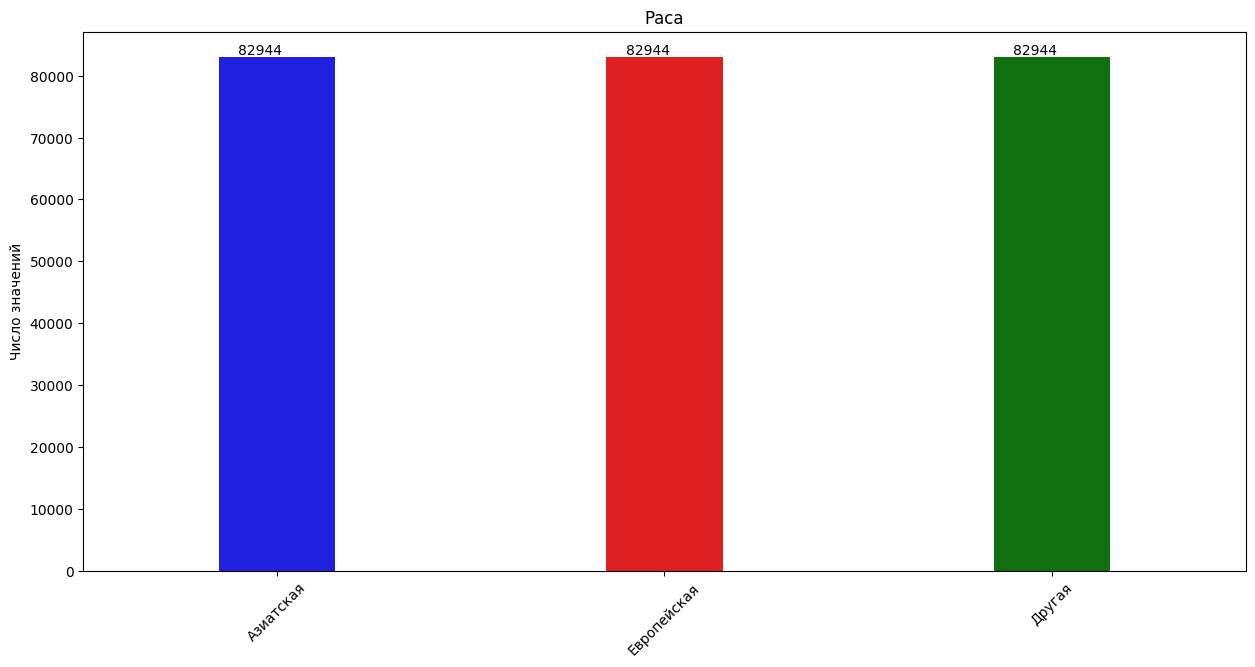


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Колонка №2: 'Пол'
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
число строк с пустыми значениями: 0
число уникальных значений: 2
  0: ' Мужской' -> кол-во: 124416
  1: ' Женский' -> кол-во: 124416


C:\Users\alexe\AppData\Local\Temp\ipykernel_11196\3997239512.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot0 = sns.barplot(x=unique_str_labels2, y=count_array, palette=colors[:unique_count], width=0.3)


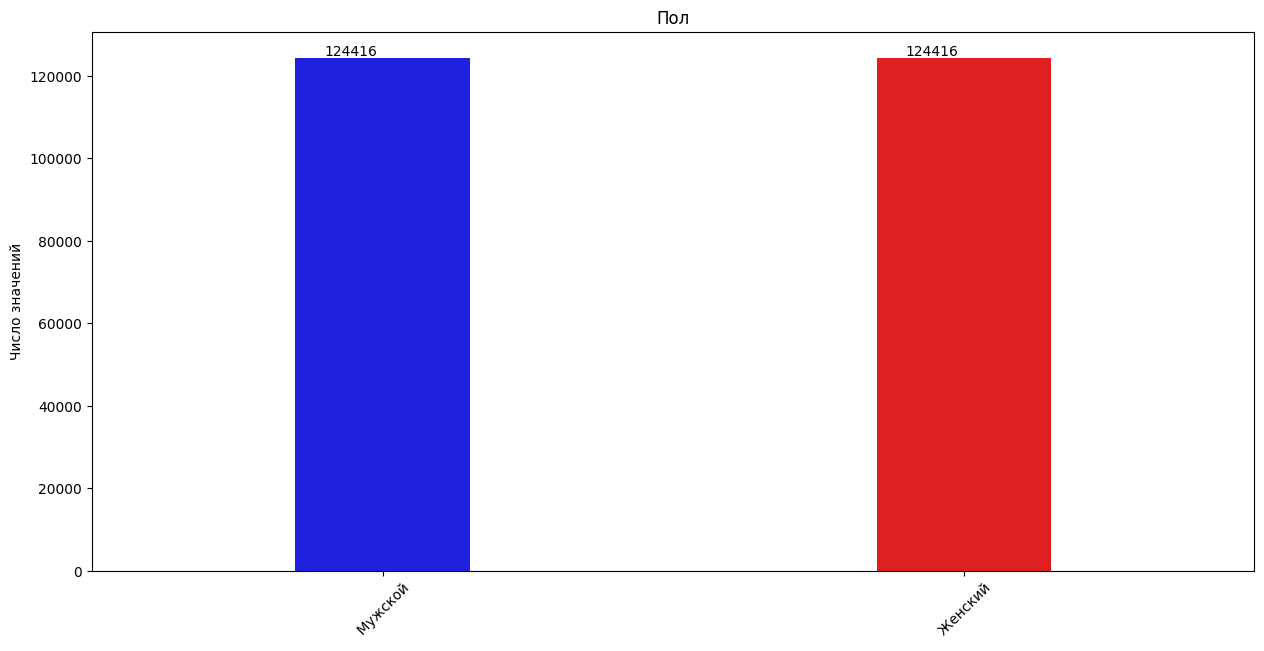


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Колонка №3: 'Возраст'
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
число строк с пустыми значениями: 0
число уникальных значений: 2
  0: ' До 70' -> кол-во: 124416
  1: ' >70' -> кол-во: 124416


C:\Users\alexe\AppData\Local\Temp\ipykernel_11196\3997239512.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot0 = sns.barplot(x=unique_str_labels2, y=count_array, palette=colors[:unique_count], width=0.3)


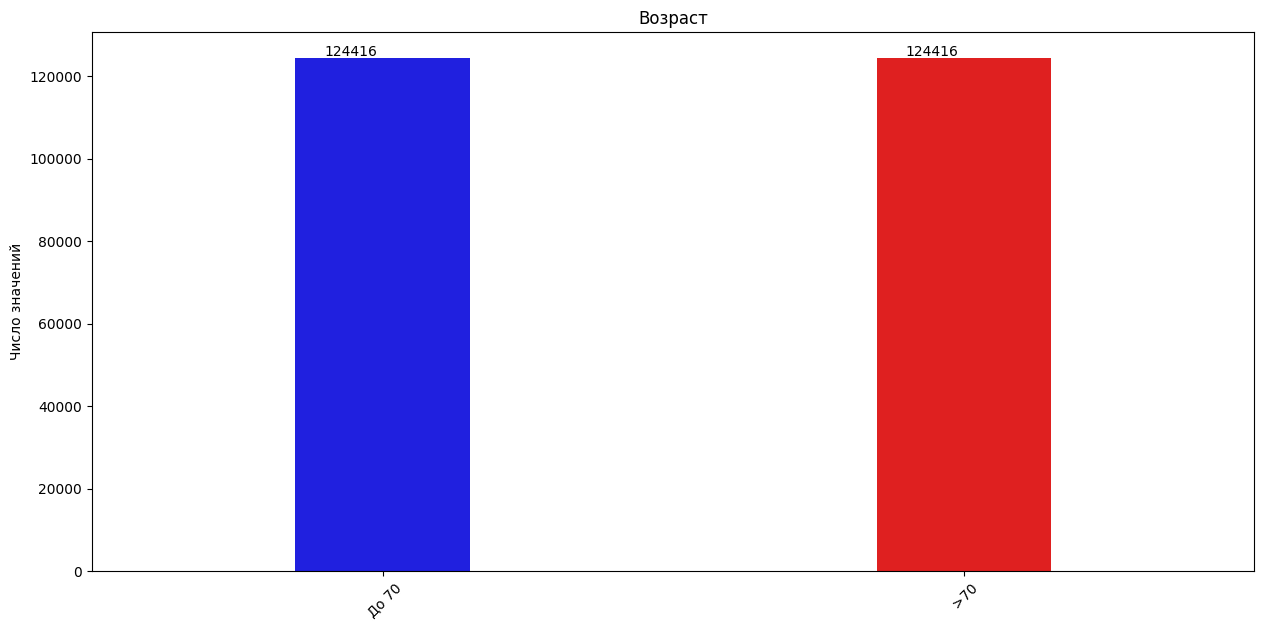


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Колонка №4: 'Статус курения'
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
число строк с пустыми значениями: 0
число уникальных значений: 3
  0: ' В настоящее время' -> кол-во: 82944
  1: ' Курение в прошлом (бросил более 1 месяца до 1 года)' -> кол-во: 82944
  2: ' Курение в прошлом (бросил более 1 года)' -> кол-во: 82944


C:\Users\alexe\AppData\Local\Temp\ipykernel_11196\3997239512.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot0 = sns.barplot(x=unique_int_labels1, y=count_array, palette=colors[:unique_count], width=0.3)


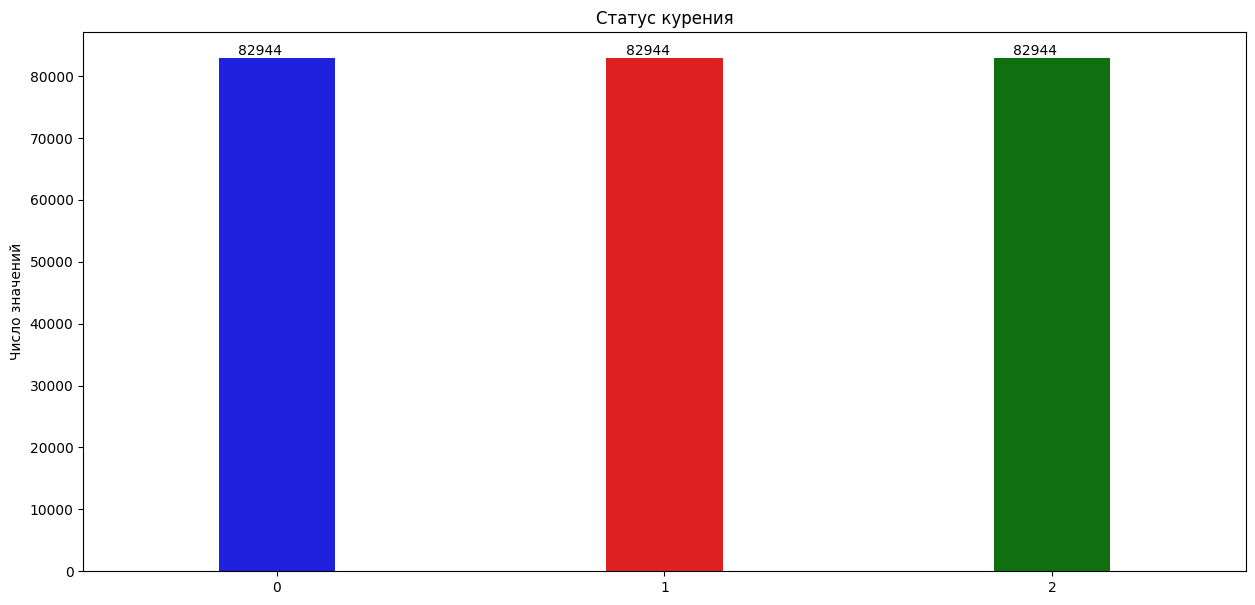


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Колонка №5: 'ECOG'
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
число строк с пустыми значениями: 0
число уникальных значений: 2
  0: ' 0-1' -> кол-во: 124416
  1: '2' -> кол-во: 124416


C:\Users\alexe\AppData\Local\Temp\ipykernel_11196\3997239512.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot0 = sns.barplot(x=unique_str_labels2, y=count_array, palette=colors[:unique_count], width=0.3)


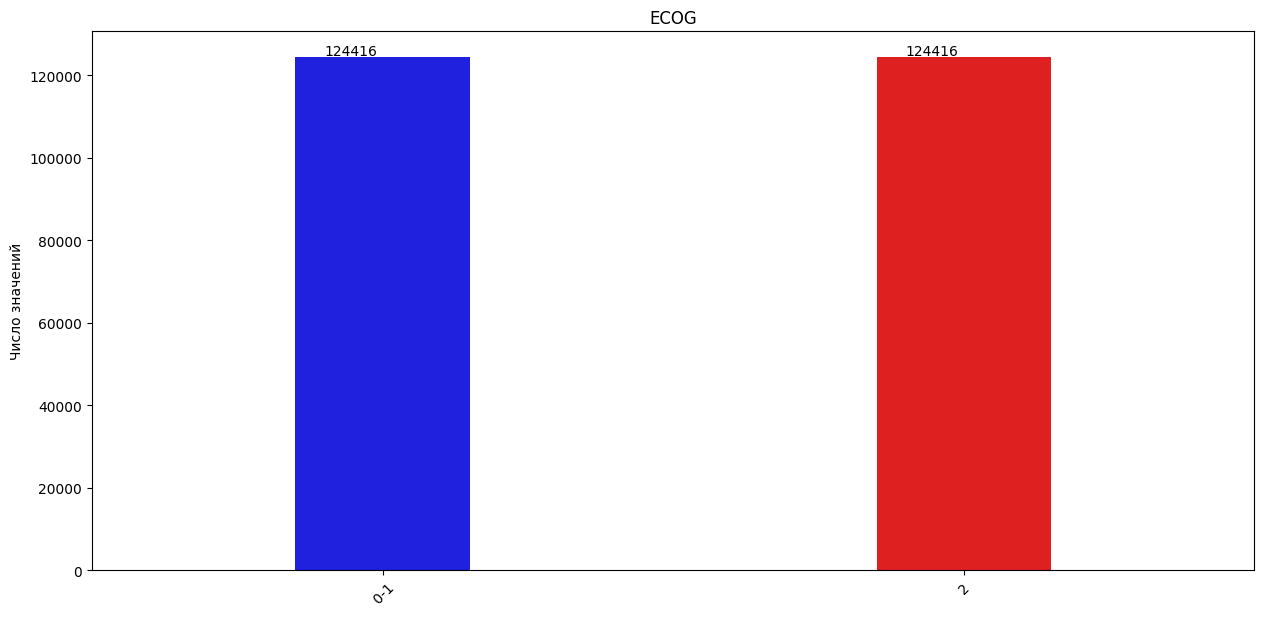


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Колонка №6: 'Есть опухолевая нагрузка? (симптомная опухоль)'
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
число строк с пустыми значениями: 0
число уникальных значений: 2
  0: ' да' -> кол-во: 124416
  1: ' нет' -> кол-во: 124416


C:\Users\alexe\AppData\Local\Temp\ipykernel_11196\3997239512.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot0 = sns.barplot(x=unique_str_labels2, y=count_array, palette=colors[:unique_count], width=0.3)


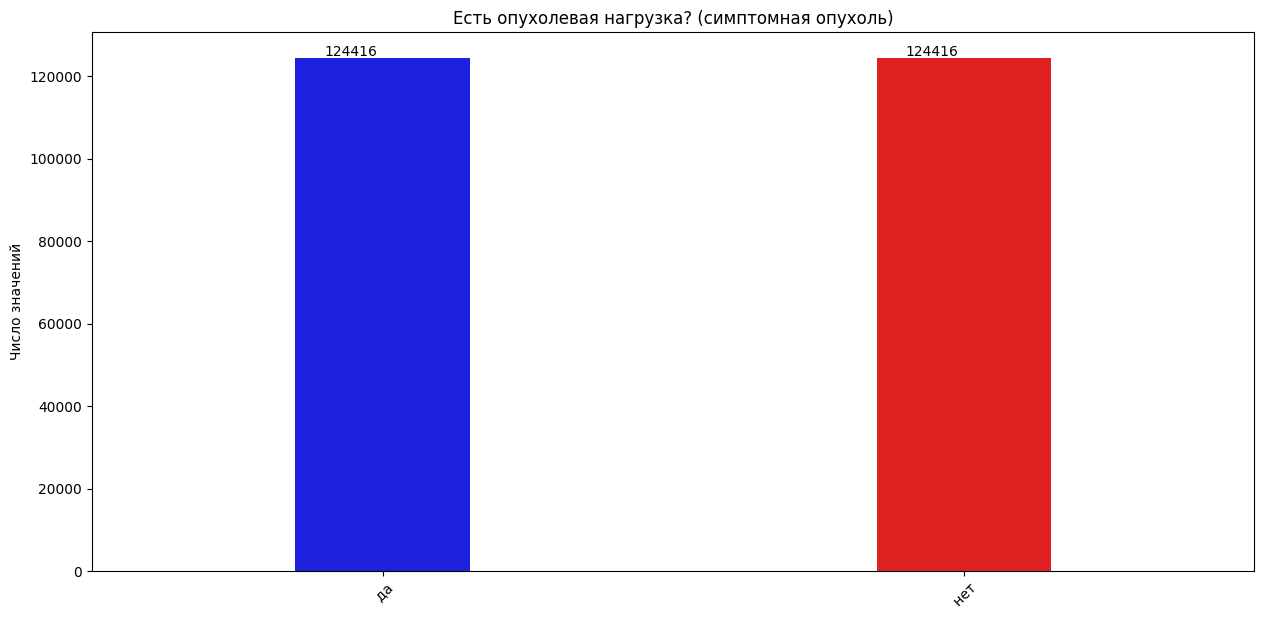


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Колонка №7: 'Ко-мутации KRAS'
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
число строк с пустыми значениями: 0
число уникальных значений: 2
  0: ' да' -> кол-во: 124416
  1: ' нет' -> кол-во: 124416


C:\Users\alexe\AppData\Local\Temp\ipykernel_11196\3997239512.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot0 = sns.barplot(x=unique_str_labels2, y=count_array, palette=colors[:unique_count], width=0.3)


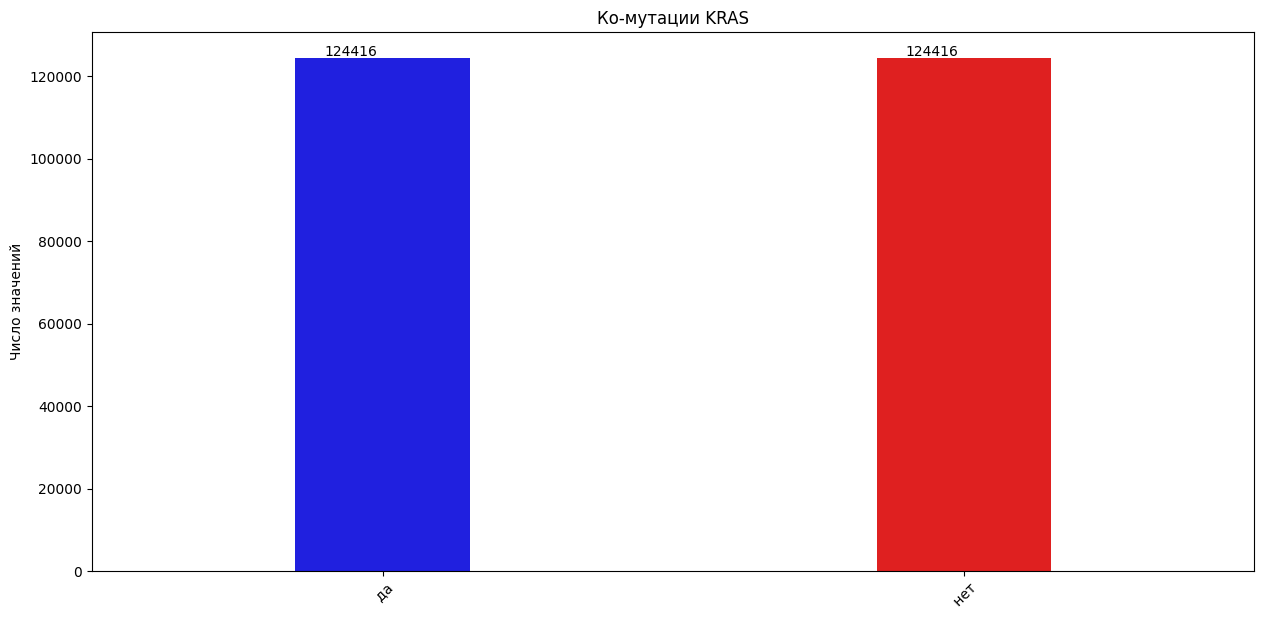


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Колонка №8: 'Ко-мутации p53.'
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
число строк с пустыми значениями: 0
число уникальных значений: 2
  0: ' да' -> кол-во: 124416
  1: ' нет' -> кол-во: 124416


C:\Users\alexe\AppData\Local\Temp\ipykernel_11196\3997239512.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot0 = sns.barplot(x=unique_str_labels2, y=count_array, palette=colors[:unique_count], width=0.3)


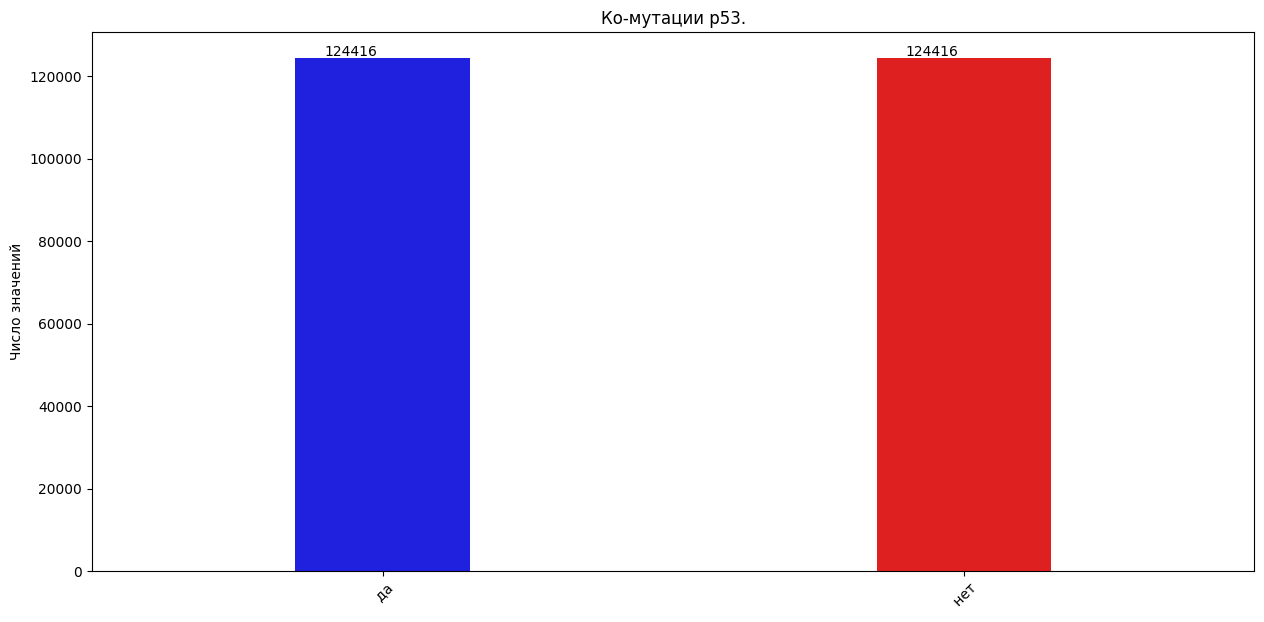


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Колонка №9: 'Ко-мутации STK11'
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
число строк с пустыми значениями: 0
число уникальных значений: 2
  0: ' да' -> кол-во: 124416
  1: ' нет' -> кол-во: 124416


C:\Users\alexe\AppData\Local\Temp\ipykernel_11196\3997239512.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot0 = sns.barplot(x=unique_str_labels2, y=count_array, palette=colors[:unique_count], width=0.3)


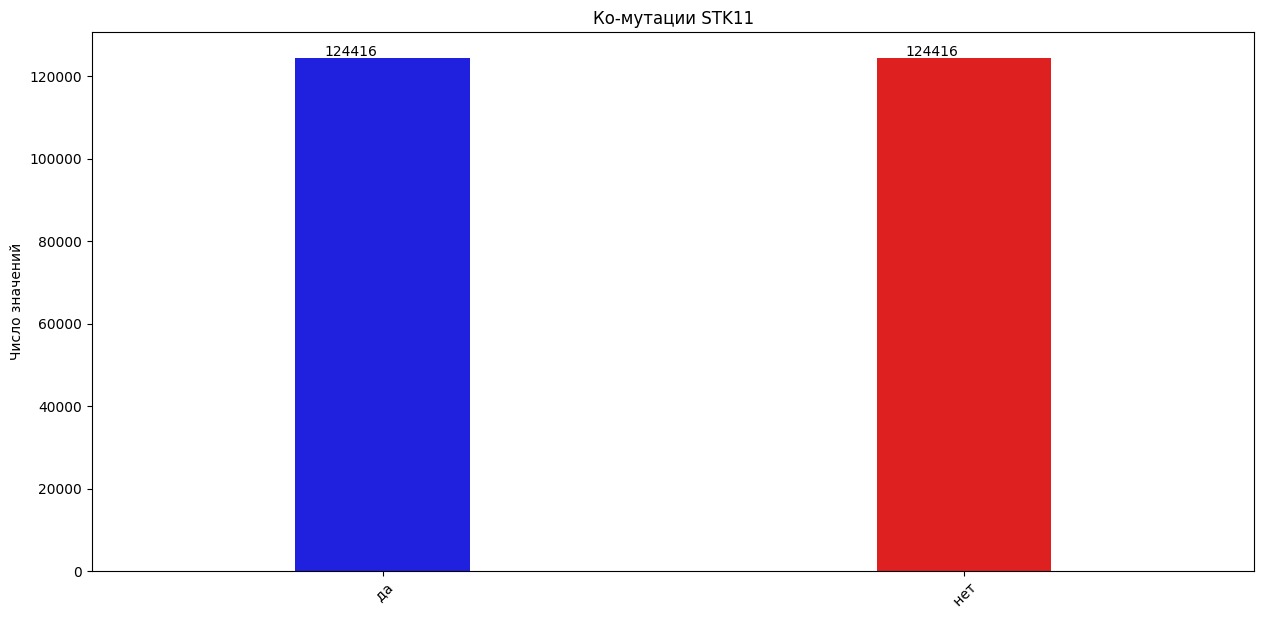


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Колонка №10: 'Ко-мутации KEAP1'
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
число строк с пустыми значениями: 0
число уникальных значений: 2
  0: ' да' -> кол-во: 124416
  1: ' нет' -> кол-во: 124416


C:\Users\alexe\AppData\Local\Temp\ipykernel_11196\3997239512.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot0 = sns.barplot(x=unique_str_labels2, y=count_array, palette=colors[:unique_count], width=0.3)


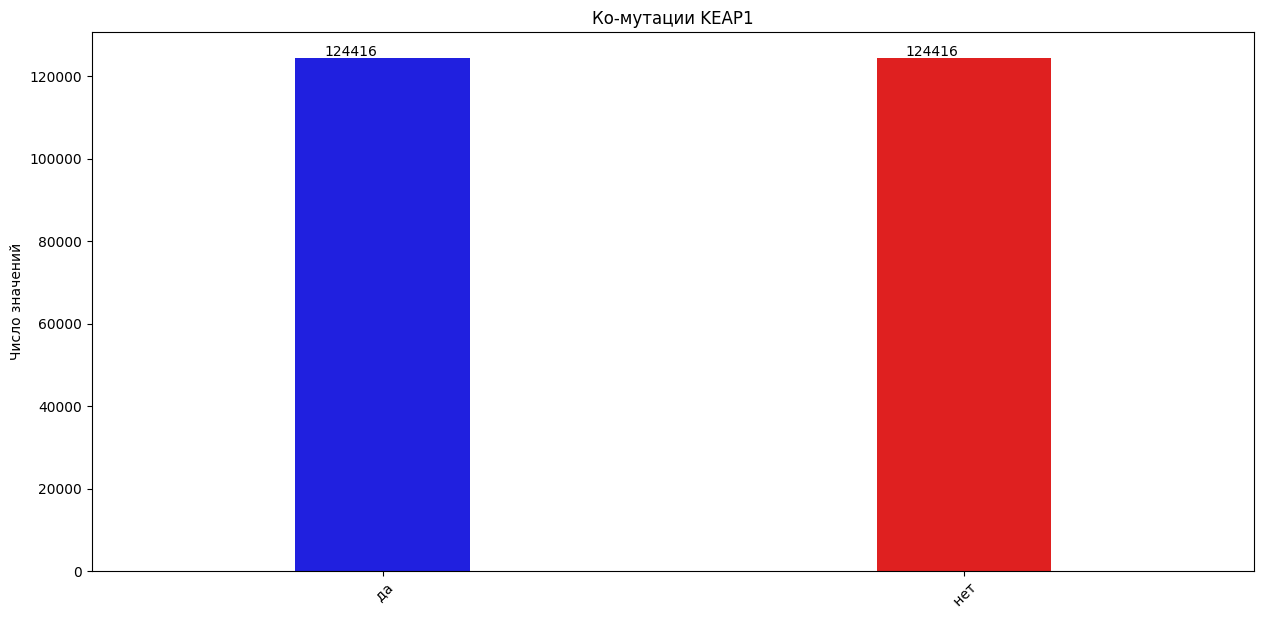


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Колонка №11: 'Срок от окончания ХЛТ'
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
число строк с пустыми значениями: 0
число уникальных значений: 3
  0: 'до 42 дней' -> кол-во: 82944
  1: 'от 43 до 60 дней' -> кол-во: 82944
  2: 'более 61 дня' -> кол-во: 82944


C:\Users\alexe\AppData\Local\Temp\ipykernel_11196\3997239512.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot0 = sns.barplot(x=unique_str_labels2, y=count_array, palette=colors[:unique_count], width=0.3)


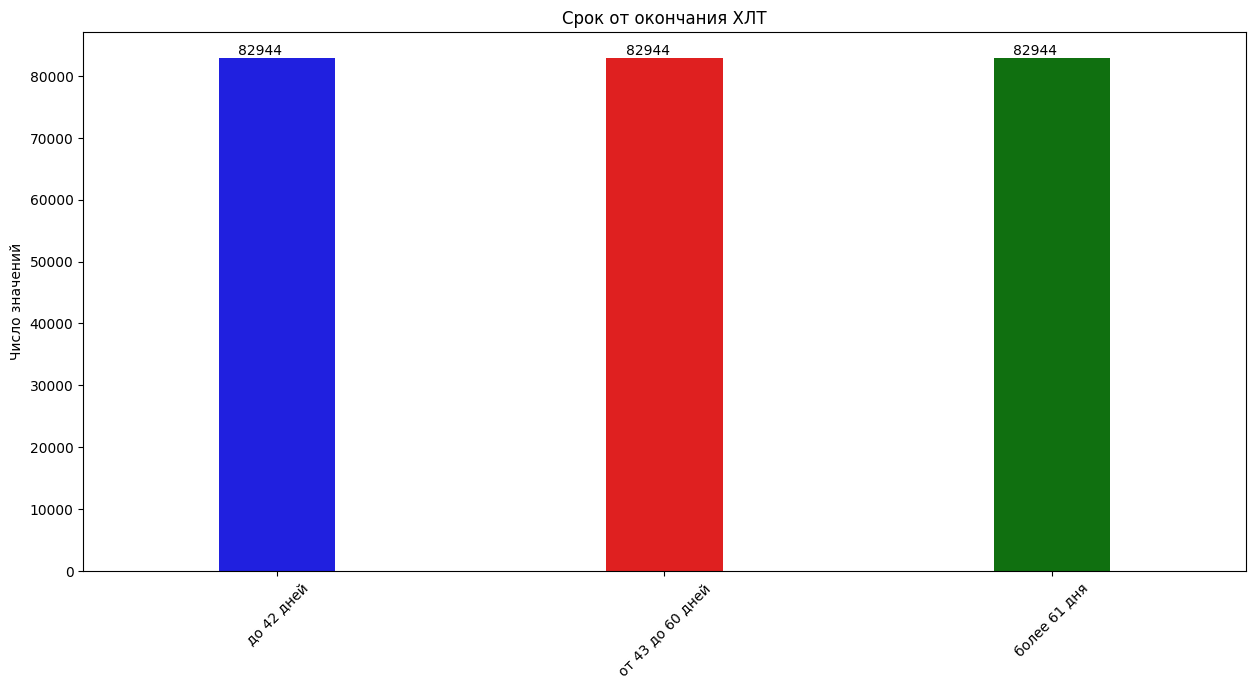


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Колонка №12: 'Молекулярный статус (только для неплоскоклеточного рака)'
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
число строк с пустыми значениями: 0
число уникальных значений: 6
  0: ' нет мутаций' -> кол-во: 41472
  1: ' не исследовались' -> кол-во: 41472
  2: ' EGFR редкий вариант' -> кол-во: 41472
  3: ' EGFR ex19' -> кол-во: 41472
  4: ' EGFR ex21' -> кол-во: 41472
  5: ' ALK позитивный' -> кол-во: 41472


C:\Users\alexe\AppData\Local\Temp\ipykernel_11196\3997239512.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot0 = sns.barplot(x=unique_str_labels2, y=count_array, palette=colors[:unique_count], width=0.3)


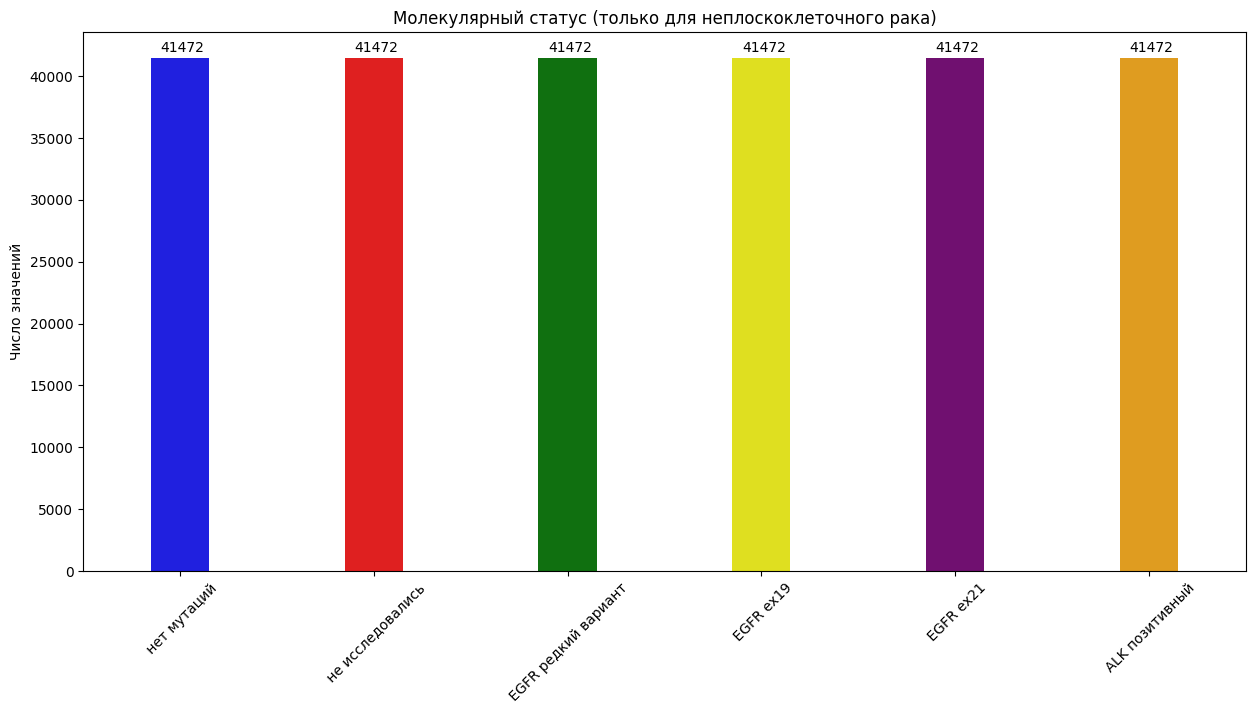


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Колонка №13: 'PD-L1 статус'
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
число строк с пустыми значениями: 0
число уникальных значений: 3
  0: ' Не исследовался' -> кол-во: 82944
  1: ' Менее 1%' -> кол-во: 82944
  2: ' Более 1%' -> кол-во: 82944


C:\Users\alexe\AppData\Local\Temp\ipykernel_11196\3997239512.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot0 = sns.barplot(x=unique_str_labels2, y=count_array, palette=colors[:unique_count], width=0.3)


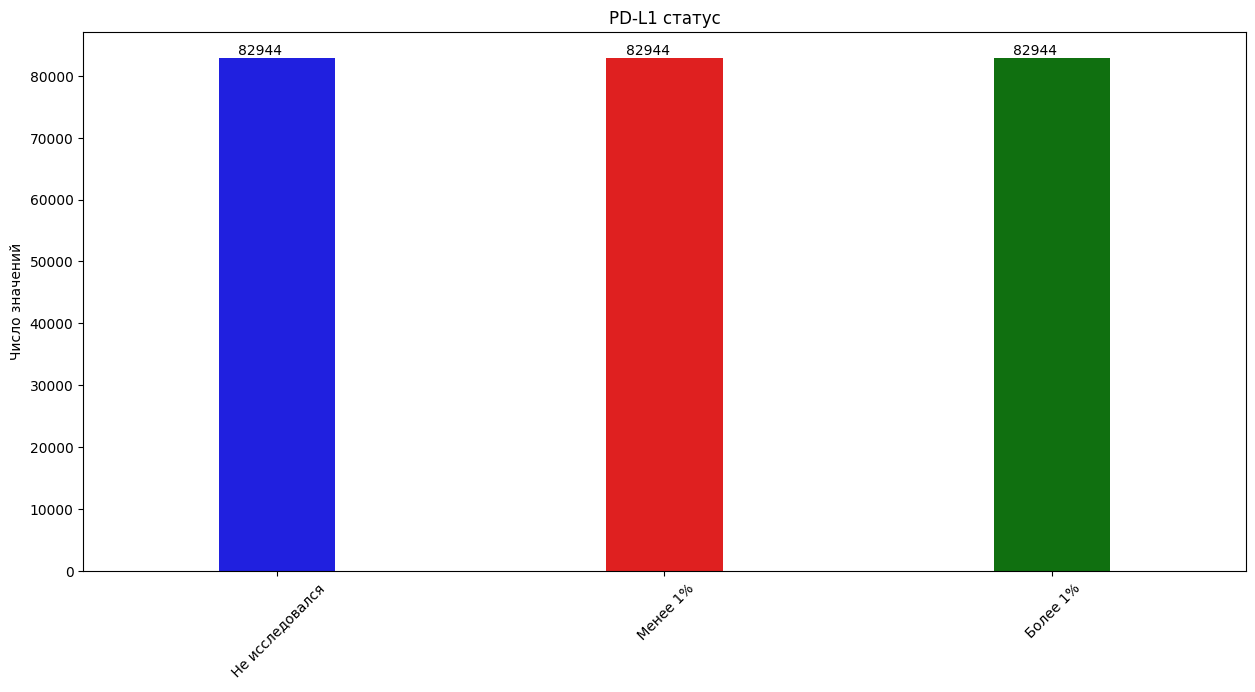


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Колонка №14: 'Предпочтение пациента по ответу на терапию'
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
число строк с пустыми значениями: 0
число уникальных значений: 2
  0: ' Результативность лечения' -> кол-во: 124416
  1: ' сохранение качества жизни' -> кол-во: 124416


C:\Users\alexe\AppData\Local\Temp\ipykernel_11196\3997239512.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot0 = sns.barplot(x=unique_str_labels2, y=count_array, palette=colors[:unique_count], width=0.3)


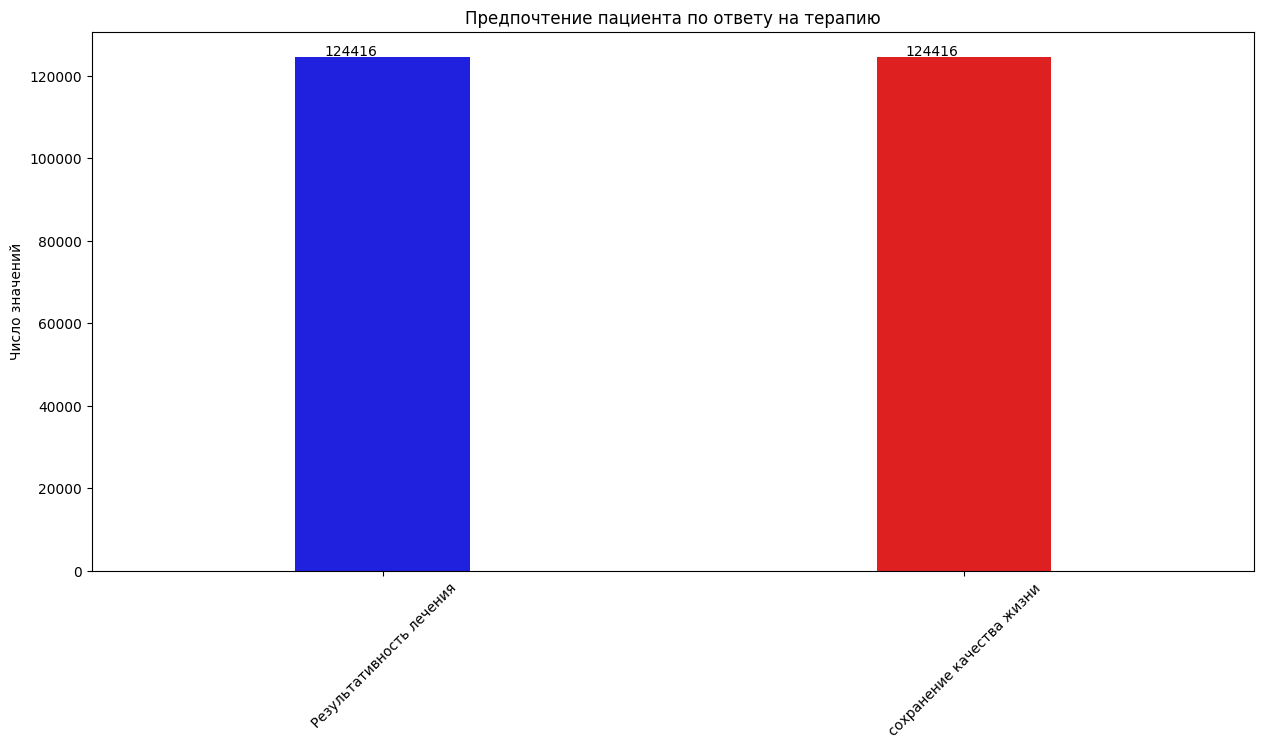


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Колонка №15: 'Ответ эксперта (Лактионов)'
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
число строк с пустыми значениями: 0
число уникальных значений: 4
  0: 'Дурвалумаб' -> кол-во: 43776
  1: 'Наблюдение' -> кол-во: 140544
  2: 'Осимертиниб' -> кол-во: 41472
  3: 'Алектиниб' -> кол-во: 23040


C:\Users\alexe\AppData\Local\Temp\ipykernel_11196\3997239512.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot0 = sns.barplot(x=unique_str_labels2, y=count_array, palette=colors[:unique_count], width=0.3)


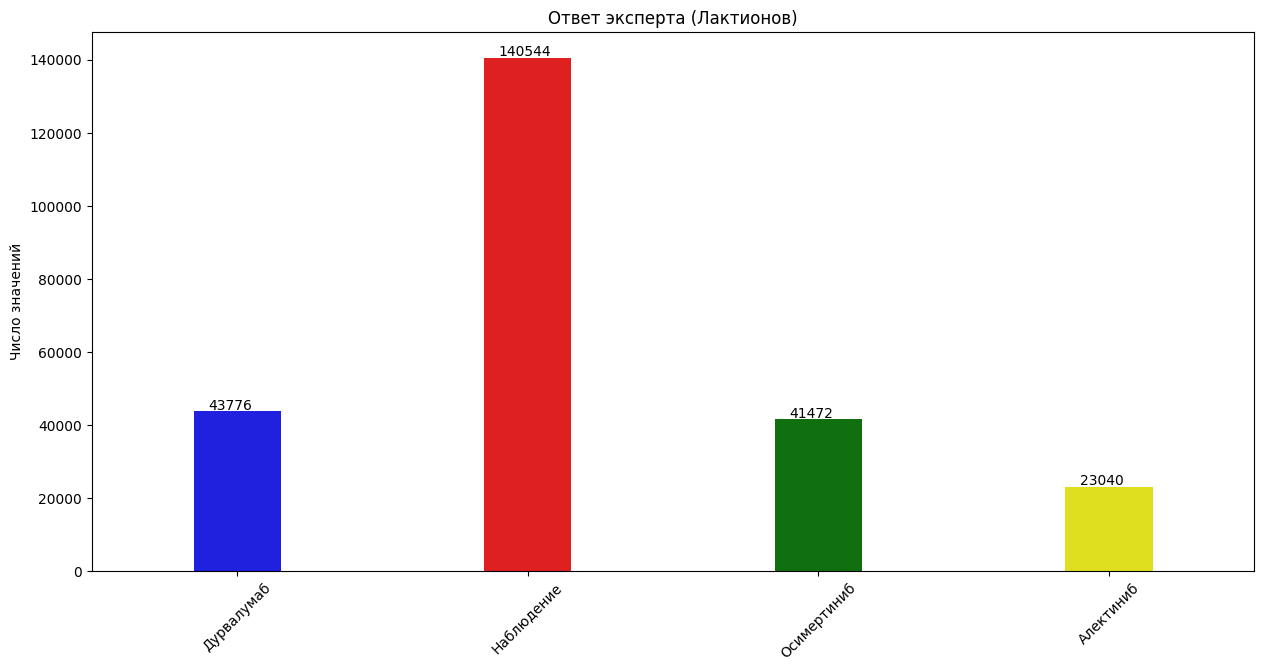


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Колонка №16: 'Поставьте галочку, если уверены на 100%'
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
число строк с пустыми значениями: 0
число уникальных значений: 2
  0: 'True' -> кол-во: 89856
  1: 'False' -> кол-во: 158976


C:\Users\alexe\AppData\Local\Temp\ipykernel_11196\3997239512.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot0 = sns.barplot(x=unique_str_labels2, y=count_array, palette=colors[:unique_count], width=0.3)


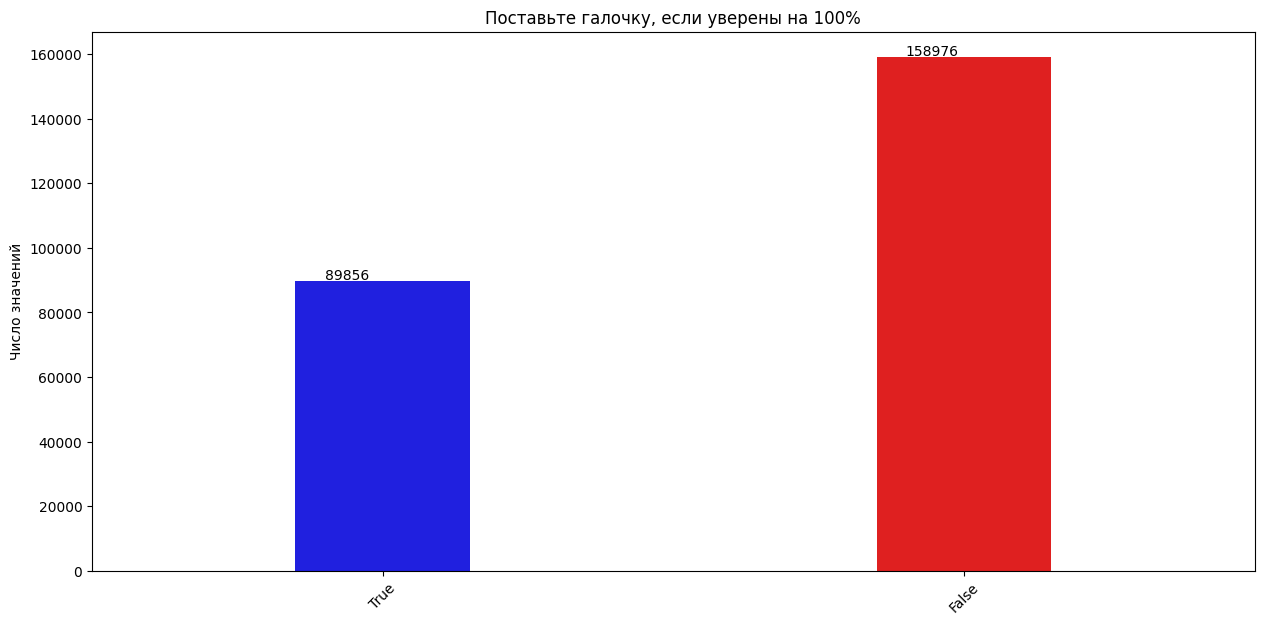


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Колонка №17: 'Если 75%'
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
число строк с пустыми значениями: 0
число уникальных значений: 2
  0: 'False' -> кол-во: 158976
  1: 'True' -> кол-во: 89856


C:\Users\alexe\AppData\Local\Temp\ipykernel_11196\3997239512.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot0 = sns.barplot(x=unique_str_labels2, y=count_array, palette=colors[:unique_count], width=0.3)


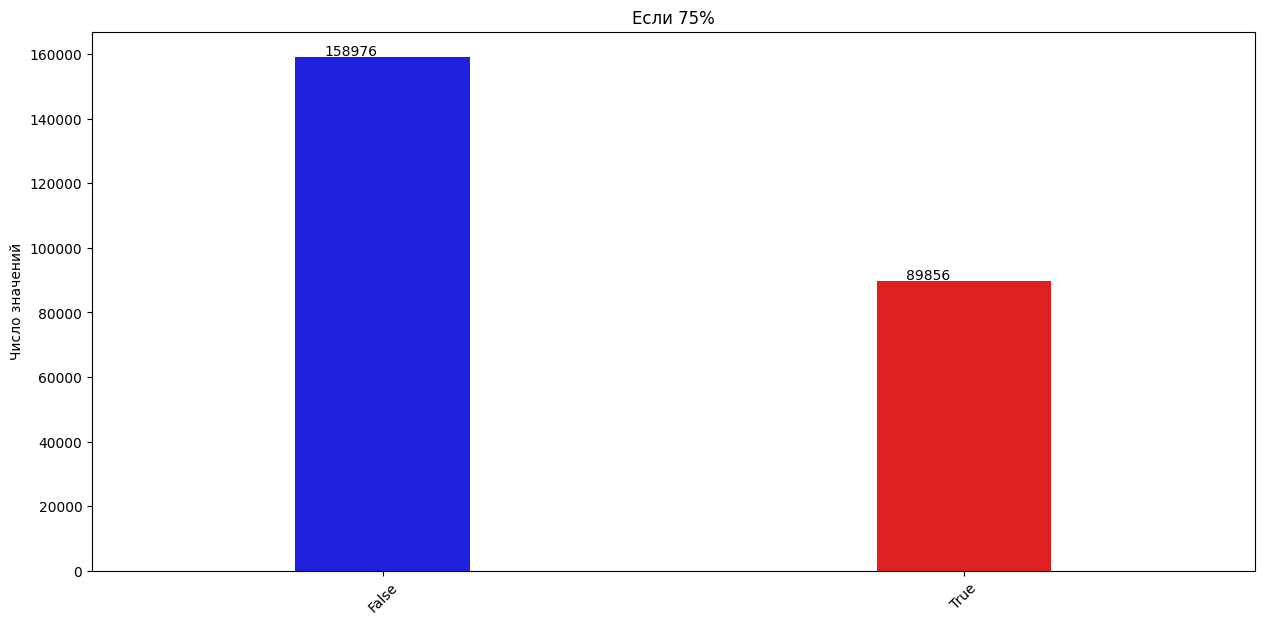


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Колонка №18: 'Если 50%'
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
число строк с пустыми значениями: 0
число уникальных значений: 2
  0: 'False' -> кол-во: 179712
  1: 'True' -> кол-во: 69120


C:\Users\alexe\AppData\Local\Temp\ipykernel_11196\3997239512.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot0 = sns.barplot(x=unique_str_labels2, y=count_array, palette=colors[:unique_count], width=0.3)


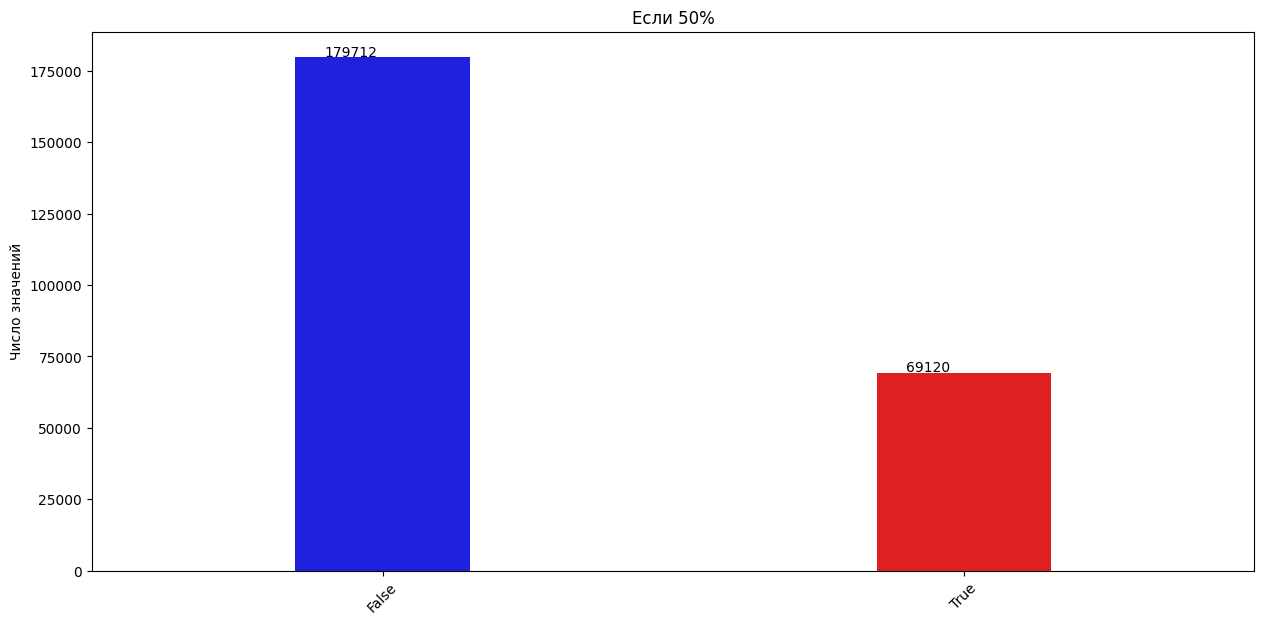


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Колонка №19: 'Альтернатива, если 50% - обязательно'
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
число строк с пустыми значениями: 0
число уникальных значений: 5
  0: '0' -> кол-во: 103680
  1: 'Дурвалумаб' -> кол-во: 39168
  2: 'Наблюдение' -> кол-во: 73728
  3: 'Осимертиниб' -> кол-во: 27648
  4: 'Алектиниб' -> кол-во: 4608


C:\Users\alexe\AppData\Local\Temp\ipykernel_11196\3997239512.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot0 = sns.barplot(x=unique_str_labels2, y=count_array, palette=colors[:unique_count], width=0.3)


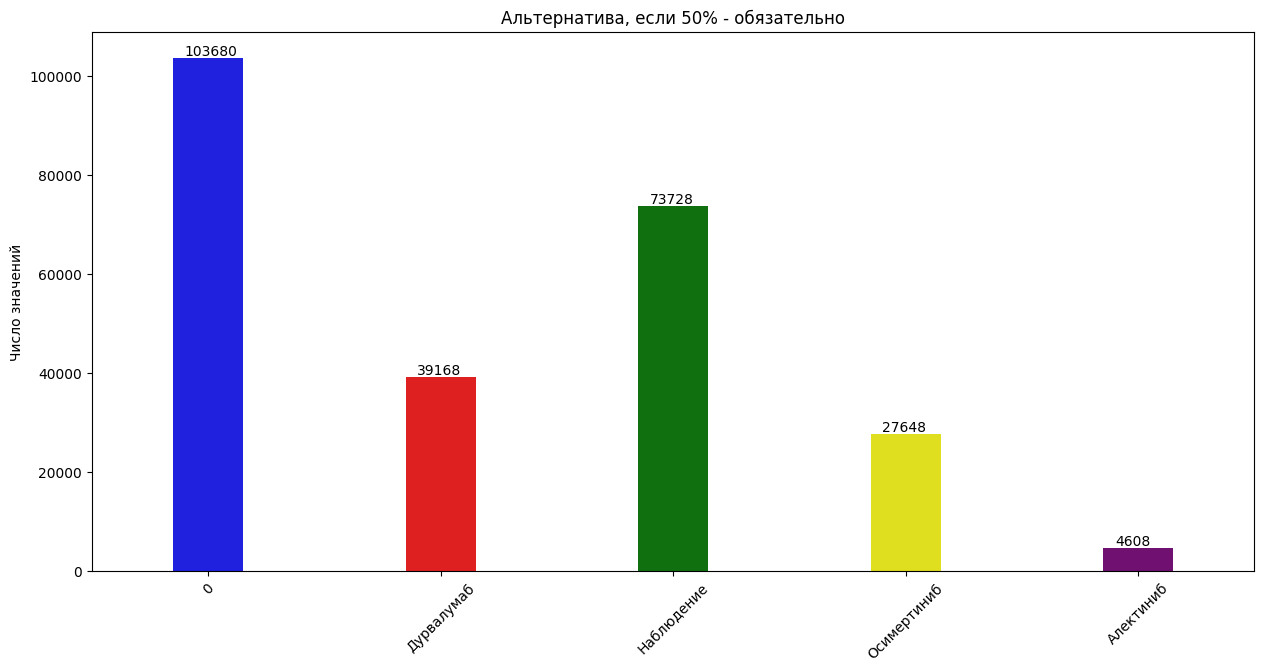


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Колонка №20: 'Комментарий'
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
число строк с пустыми значениями: 0
число уникальных значений: 11
  0: '0' -> кол-во: 62208
  1: 'Нет доказательной базы для назначения после перерыва >61 дня после ХЛТ' -> кол-во: 23040
  2: 'Возможно есть мутации и эффективность Дурвалумаба будет низкой' -> кол-во: 11520
  3: 'Возможна низкая эффективность Дурвалумаба, Осимертиниб без доказательной базы' -> кол-во: 59904
  4: 'Возможна низкая эффективность Дурвалумаба, Осимертиниб без доказательной базы, эффективность Осимертиниба ниже при 21 экзоне' -> кол-во: 34560
  5: 'Возможна низкая эффективность Дурвалумаба, Алектиниб без доказательной базы' -> кол-во: 27648
  6: 'Возможна низкая эффективность Дурвалумаба при PD-1 < 1%' -> кол-во: 9216
  7: 'Возможна низкая эффективность Дурвалумаба при PD-1 < 1%, воз

C:\Users\alexe\AppData\Local\Temp\ipykernel_11196\3997239512.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot0 = sns.barplot(x=unique_int_labels1, y=count_array, palette=colors[:unique_count], width=0.3)


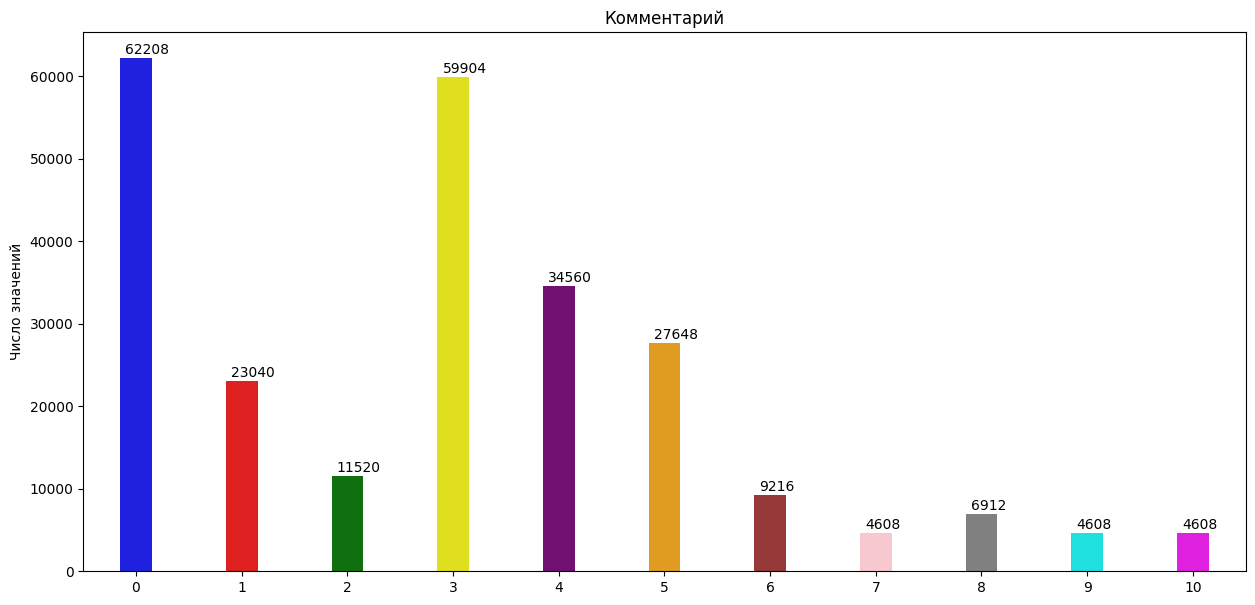

In [9]:
# Пробегаюсь по всем колонкам датафрейма и оцениваю балансировку
# i = 0
for col_name in df1_colnames:
  # print(f"i: {i}, col_name: '{col_name}'")
  # i += 1
  if 'id_ответа' == col_name:
    continue
  print_column_info(df1, col_name)

Вывод: первые 14 колонок датасета "Раса" .. "Предпочтение пациента по ответу на терапию" идеально сбалансированы - число элементов каждой категории одинаковое.

# Подготовка данных для нейронной сети

## Датафрейм для обучения нейронной сети


In [10]:
# Создаем датафрейм, который будет использоваться для обучения нейронной сети
# alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

# 00 - 'A' - 'id_ответа' ===> можно исключить
# 01 - 'B1','B2','B3' - 'Раса' - 3типа
# 02 - 'C1' - 'Пол' - 2типа
# 03 - 'D1' - 'Возраст' - 2типа
# 04 - 'E1','E2','E3' - 'Статус курения' - 3типа
# 05 - 'F1' - 'ECOG' - 2типа
# 06 - 'G1' - 'Есть опухолевая нагрузка? (симптомная опухоль)' - 2типа
# 07 - 'H1' - 'Ко-мутации KRAS' - 2типа
# 08 - 'I1' - 'Ко-мутации p53.' - 2типа
# 09 - 'J1' - 'Ко-мутации STK11' - 2типа
# 10 - 'K1' - 'Ко-мутации KEAP1' - 2типа
# 11 - 'L1','L2','L3' - 'Срок от окончания ХЛТ' - 3типа
# 12 - 'M1','M2','M3','M4','M5','M6' - 'Молекулярный статус (только для неплоскоклеточного рака)' - 6типов
# 13 - 'N1','N2','N3' - 'PD-L1 статус' - 3типа
# 14 - 'O1' - 'Предпочтение пациента по ответу на терапию' - 2типа
#~~~
# 15 - P1 - 'Ответ эксперта (Лактионов)'
# 16 - P1 - 'Поставьте галочку, если уверены на 100%'
# 17 - P1 - 'Если 75%'
# 18 - P1 - 'Если 50%'
# 19 - P1 - 'Альтернатива, если 50% - обязательно'
# 20 - P1 - 'Комментарий'

dfxy1_cols = ['B1','B2','B3','C1','D1','E1','E2','E3','F1','G1','H1','I1','J1','K1',
              'L1','L2','L3','M1','M2','M3','M4','M5','M6','N1','N2','N3','O1','P1']
#~~~~~~~~~~~~~~~~~~~~~~~~
dfxy1 = pd.DataFrame(columns=dfxy1_cols, dtype=int)
print(f'размеры датафрейма dfxy1: {dfxy1.shape}')
print(f'  число строк: {dfxy1.shape[0]}')
print(f'  число колонок: {dfxy1.shape[1]}')

# dfxy1.info()

размеры датафрейма dfxy1: (0, 28)
  число строк: 0
  число колонок: 28


## 01 - 'B1','B2','B3' - 'Раса' - 3типа

In [11]:
def print_unique_values(df, col_name):
  '''
  Функция отображение уникальных значений колонки

  Args:
    df - pandas.DataFrame
    col_name - column_name название колонки

  Returns:
    отображение иформации
  '''

  print(f"колонка: '{col_name}'")
  # строки с уникальными значениями unique_values
  unique_values = df1[col_name].unique().tolist()
  unique_count = len(unique_values)
  print(f'число уникальных значений: {unique_count}')

  #~~~~~~~~~~~~~~~~~~~~~~~~
  unique_values2 = list()
  for i in range(unique_count):
    u_item_str = str(unique_values[i])
    u_item_str2 = u_item_str.strip()
    unique_values2.append(u_item_str2)
  #~~~
  unique_values2.sort()

  #~~~~~~~~~~~~~~~~~~~~~~~~
  for i in range(unique_count):
    u_item_str2 = unique_values2[i]
    u_item_str3 = u_item_str2.lower()
    print(f"  {i}: '{u_item_str2}'; '{u_item_str3}'")

In [12]:
def check_categorization(df, col_name, cat_arr):
  '''
  Функция проверки категоризации

  Args:
    df - pandas.DataFrame
    col_name - column_name название колонки
    cat_arr - массив категоризованных значений

  Returns:
    отображение иформации
  '''

  print(f"колонка: '{col_name}'")
  # строки с уникальными значениями unique_values
  unique_values = df1[col_name].unique().tolist()
  unique_count = len(unique_values)
  print(f'число уникальных значений: {unique_count}')
  equal_items = 0
  for i in range(unique_count):
    u_item_str = str(unique_values[i])
    row_inx = 0
    for elem_val in df1[col_name]:
      elem_str = str(elem_val)
      if u_item_str == elem_str:
        print(f"  {i}: '{u_item_str}', category code: {cat_arr[row_inx]}, row index: {row_inx}")
        equal_items += 1
        break
      row_inx += 1
  print(f'  число элементов, по которым произведена проверка категориального кодирования: {equal_items}')

In [13]:
# 1->21: 'Раса'
# трансформирую значения в категориальные и добавляю их в датафрейм
inx1 = 1
col_name1 = df1_colnames[inx1]
print_unique_values(df1, col_name1)

колонка: 'Раса'
число уникальных значений: 3
  0: 'Азиатская'; 'азиатская'
  1: 'Другая'; 'другая'
  2: 'Европейская'; 'европейская'


In [14]:
def getHumanRaceCode(str_val):
  '''
  Получение категориального значения `Раса` по текстовому значению

  Args:
    str_val - текстовое значение

  Returns:
    колонка: 'Раса'
    число уникальных значений: 3
      0: 'Азиатская', 'азиатская'
      1: 'Европейская', 'европейская'
      2: 'Другая', 'другая'
  '''

  str2 = str_val.lower().strip()
  retVal = -1
  if 'азиатская' == str2:
    retVal = 0
  elif 'европейская' == str2:
    retVal = 1
  elif 'другая' == str2:
    retVal = 2

  return retVal

In [15]:
# создаем numpy массив integer из нулей, число элементов равно числу строк нашего data frame
# cat - category
cat_arr1 = np.zeros(df1.shape[0], dtype=int)

#~~~~~~~~~~~~~~~~~~~~~~~~
row_inx1 = 0
err_count1 = 0
for elem_val1 in df1[col_name1]:
  elem_str1 = str(elem_val1)
  digi_code1 = getHumanRaceCode(elem_str1)
  if -1 == digi_code1:
    err_count1 += 1
    continue
  cat_arr1[row_inx1] = digi_code1
  row_inx1 += 1

check_categorization(df1, col_name1, cat_arr1)
print(f"число строк, которые не прошли категоризацию: {err_count1}")

колонка: 'Раса'
число уникальных значений: 3
  0: 'Азиатская', category code: 0, row index: 0
  1: 'Европейская', category code: 1, row index: 108
  2: 'Другая', category code: 2, row index: 216
  число элементов, по которым произведена проверка категориального кодирования: 3
число строк, которые не прошли категоризацию: 0


In [16]:
#~ преобразование массива в формат one-hot-encoding (3-класса)
cat_arr2 = utils.to_categorical(cat_arr1, 3)
#~ приведение типа элементов массива
cat_arr2_i = cat_arr2.astype(int)

#~ добавляем данные по столбцам в датафрейм
#~ 01 - 'B1','B2','B3' - 'Раса' - 3типа
dfxy1 = dfxy1.assign(B1=cat_arr2_i[:, 0])
dfxy1 = dfxy1.assign(B2=cat_arr2_i[:, 1])
dfxy1 = dfxy1.assign(B3=cat_arr2_i[:, 2])

del cat_arr2
del cat_arr2_i

# dfxy1.head(3)

## 02 - 'C1' - 'Пол' - 2типа

In [17]:
# 2->21: 'Пол'
inx1 = 2
col_name1 = df1_colnames[inx1]
print_unique_values(df1, col_name1)

колонка: 'Пол'
число уникальных значений: 2
  0: 'Женский'; 'женский'
  1: 'Мужской'; 'мужской'


In [18]:
def getGenderCode(str_val):
  '''
  Получение категориального значения `Пол` по текстовому значению

  Args:
    str_val - текстовое значение

  Returns:
    колонка: 'Пол'
    число уникальных значений: 2
      0: ' Мужской', 'мужской'
      1: ' Женский', 'женский'
  '''

  str2 = str_val.lower().strip()
  retVal = -1
  if 'мужской' == str2:
    retVal = 0
  elif 'женский' == str2:
    retVal = 1

  return retVal

In [19]:
row_inx1 = 0
err_count1 = 0
for elem_val1 in df1[col_name1]:
  elem_str1 = str(elem_val1)
  digi_code1 = getGenderCode(elem_str1)
  if -1 == digi_code1:
    err_count1 += 1
    continue
  cat_arr1[row_inx1] = digi_code1
  row_inx1 += 1

check_categorization(df1, col_name1, cat_arr1)
print(f"число строк, которые не прошли категоризацию: {err_count1}")

колонка: 'Пол'
число уникальных значений: 2
  0: ' Мужской', category code: 0, row index: 0
  1: ' Женский', category code: 1, row index: 324
  число элементов, по которым произведена проверка категориального кодирования: 2
число строк, которые не прошли категоризацию: 0


In [20]:
#~ добавляем данные в датафрейм
# 02 - 'C1' - 'Пол' - 2типа
dfxy1 = dfxy1.assign(C1=cat_arr1)
# dfxy1.head(3)

## 03 - 'D1' - 'Возраст' - 2типа


In [21]:
# 3->21: 'Возраст'
inx1 = 3
col_name1 = df1_colnames[inx1]
print_unique_values(df1, col_name1)

колонка: 'Возраст'
число уникальных значений: 2
  0: '>70'; '>70'
  1: 'До 70'; 'до 70'


In [22]:
def getAgeCode(str_val):
  '''
  Получение категориального значения `Возраст` по текстовому значению

  Args:
    str_val - текстовое значение

  Returns:
    колонка: 'Возраст'
    число уникальных значений: 2
      0: ' До 70', 'до 70'
      1: ' >70', '>70'
  '''

  str2 = str_val.lower().strip()
  retVal = -1
  if 'до 70' == str2:
    retVal = 0
  elif '>70' == str2:
    retVal = 1

  return retVal

In [23]:
row_inx1 = 0
err_count1 = 0
for elem_val1 in df1[col_name1]:
  elem_str1 = str(elem_val1)
  digi_code1 = getAgeCode(elem_str1)
  if -1 == digi_code1:
    err_count1 += 1
    continue
  cat_arr1[row_inx1] = digi_code1
  row_inx1 += 1

check_categorization(df1, col_name1, cat_arr1)
print(f"число строк, которые не прошли категоризацию: {err_count1}")

колонка: 'Возраст'
число уникальных значений: 2
  0: ' До 70', category code: 0, row index: 0
  1: ' >70', category code: 1, row index: 648
  число элементов, по которым произведена проверка категориального кодирования: 2
число строк, которые не прошли категоризацию: 0


In [24]:
#~ добавляем данные в датафрейм
# 03 - 'D1' - 'Возраст' - 2типа
dfxy1 = dfxy1.assign(D1=cat_arr1)
# dfxy1.head(3)

## 04 - 'E1','E2','E3' - 'Статус курения' - 3типа


In [25]:
# 4->21: 'Статус курения'
inx1 = 4
col_name1 = df1_colnames[inx1]
print_unique_values(df1, col_name1)

колонка: 'Статус курения'
число уникальных значений: 3
  0: 'В настоящее время'; 'в настоящее время'
  1: 'Курение в прошлом (бросил более 1 года)'; 'курение в прошлом (бросил более 1 года)'
  2: 'Курение в прошлом (бросил более 1 месяца до 1 года)'; 'курение в прошлом (бросил более 1 месяца до 1 года)'


In [26]:
def getSmokingStatusCode(str_val):
  '''
  Получение категориального значения `Статус курения` по текстовому значению

  Args:
    str_val - текстовое значение

  Returns:
    колонка: 'Статус курения'
    число уникальных значений: 3
      0: ' В настоящее время', 'в настоящее время'
      1: ' Курение в прошлом (бросил более 1 месяца до 1 года)', 'курение в прошлом (бросил более 1 месяца до 1 года)'
      2: ' Курение в прошлом (бросил более 1 года)', 'курение в прошлом (бросил более 1 года)'
  '''

  str2 = str_val.lower().strip()
  retVal = -1
  if 'в настоящее время' == str2:
    retVal = 0
  elif 'курение в прошлом (бросил более 1 месяца до 1 года)' == str2:
    retVal = 1
  elif 'курение в прошлом (бросил более 1 года)' == str2:
    retVal = 2

  return retVal

In [27]:
row_inx1 = 0
err_count1 = 0
for elem_val1 in df1[col_name1]:
  elem_str1 = str(elem_val1)
  digi_code1 = getSmokingStatusCode(elem_str1)
  if -1 == digi_code1:
    err_count1 += 1
    continue
  cat_arr1[row_inx1] = digi_code1
  row_inx1 += 1

check_categorization(df1, col_name1, cat_arr1)
print(f"число строк, которые не прошли категоризацию: {err_count1}")

колонка: 'Статус курения'
число уникальных значений: 3
  0: ' В настоящее время', category code: 0, row index: 0
  1: ' Курение в прошлом (бросил более 1 месяца до 1 года)', category code: 1, row index: 1296
  2: ' Курение в прошлом (бросил более 1 года)', category code: 2, row index: 2592
  число элементов, по которым произведена проверка категориального кодирования: 3
число строк, которые не прошли категоризацию: 0


In [28]:
#~ преобразование массива в формат one-hot-encoding (3-класса)
cat_arr2 = utils.to_categorical(cat_arr1, 3)
#~ приведение типа элементов массива
cat_arr2_i = cat_arr2.astype(int)

#~ добавляем данные по столбцам в датафрейм
#~ 04 - 'E1','E2','E3' - 'Статус курения' - 3типа
dfxy1 = dfxy1.assign(E1=cat_arr2_i[:, 0])
dfxy1 = dfxy1.assign(E2=cat_arr2_i[:, 1])
dfxy1 = dfxy1.assign(E3=cat_arr2_i[:, 2])

del cat_arr2
del cat_arr2_i

# dfxy1.head(3)

## 05 - 'F1' - 'ECOG' - 2типа

In [29]:
# 5->21: 'ECOG'
inx1 = 5
col_name1 = df1_colnames[inx1]
print_unique_values(df1, col_name1)

колонка: 'ECOG'
число уникальных значений: 2
  0: '0-1'; '0-1'
  1: '2'; '2'


In [30]:
def getEcogCode(str_val):
  '''
  Получение категориального значения `ECOG` по текстовому значению

  Args:
    str_val - текстовое значение

  Returns:
    колонка: 'ECOG'
    число уникальных значений: 2
      0: ' 0-1', '0-1'
      1: '2', '2'
  '''

  str2 = str_val.lower().strip()
  retVal = -1
  if '0-1' == str2:
    retVal = 0
  elif '2' == str2:
    retVal = 1

  return retVal

In [31]:
row_inx1 = 0
err_count1 = 0
for elem_val1 in df1[col_name1]:
  elem_str1 = str(elem_val1)
  digi_code1 = getEcogCode(elem_str1)
  if -1 == digi_code1:
    err_count1 += 1
    continue
  cat_arr1[row_inx1] = digi_code1
  row_inx1 += 1

check_categorization(df1, col_name1, cat_arr1)
print(f"число строк, которые не прошли категоризацию: {err_count1}")

колонка: 'ECOG'
число уникальных значений: 2
  0: ' 0-1', category code: 0, row index: 0
  1: '2', category code: 1, row index: 3888
  число элементов, по которым произведена проверка категориального кодирования: 2
число строк, которые не прошли категоризацию: 0


In [32]:
#~ добавляем данные в датафрейм
# 05 - 'F1' - 'ECOG' - 2типа
dfxy1 = dfxy1.assign(F1=cat_arr1)
dfxy1.head(3)

,B1,B2,B3,C1,D1,E1,E2,E3,F1,G1,...,M2,M3,M4,M5,M6,N1,N2,N3,O1,P1
0,1,0,0,0,0,1,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,0,0,0,1,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,0,0,0,1,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 06 - 'G1' - 'Есть опухолевая нагрузка? (симптомная опухоль)' - 2типа


In [33]:
# 6->21: 'Есть опухолевая нагрузка? (симптомная опухоль)'
inx1 = 6
col_name1 = df1_colnames[inx1]
print_unique_values(df1, col_name1)

колонка: 'Есть опухолевая нагрузка? (симптомная опухоль)'
число уникальных значений: 2
  0: 'да'; 'да'
  1: 'нет'; 'нет'


In [34]:
def getNoYesStrCode(str_val):
  '''
  Получение категориального значения `нет-да` по текстовому значению

  Args:
    str_val - текстовое значение

  Returns:
    число уникальных значений: 2
    0: ' нет', 'нет'
    1: ' да', 'да'
  '''

  str2 = str_val.lower().strip()
  retVal = -1
  if 'нет' == str2:
    retVal = 0
  elif 'да' == str2:
    retVal = 1

  return retVal

In [35]:
row_inx1 = 0
err_count1 = 0
for elem_val1 in df1[col_name1]:
  elem_str1 = str(elem_val1)
  digi_code1 = getNoYesStrCode(elem_str1)
  if -1 == digi_code1:
    err_count1 += 1
    continue
  cat_arr1[row_inx1] = digi_code1
  row_inx1 += 1

check_categorization(df1, col_name1, cat_arr1)
print(f"число строк, которые не прошли категоризацию: {err_count1}")

колонка: 'Есть опухолевая нагрузка? (симптомная опухоль)'
число уникальных значений: 2
  0: ' да', category code: 1, row index: 0
  1: ' нет', category code: 0, row index: 7776
  число элементов, по которым произведена проверка категориального кодирования: 2
число строк, которые не прошли категоризацию: 0


In [36]:
#~ добавляем данные в датафрейм
#~ 06 - 'G1' - 'Есть опухолевая нагрузка? (симптомная опухоль)' - 2типа
dfxy1 = dfxy1.assign(G1=cat_arr1)
dfxy1.head(3)

,B1,B2,B3,C1,D1,E1,E2,E3,F1,G1,...,M2,M3,M4,M5,M6,N1,N2,N3,O1,P1
0,1,0,0,0,0,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,0,0,0,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,0,0,0,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 07 - 'H1' - 'Ко-мутации KRAS' - 2типа

In [37]:
# 7->21: 'Ко-мутации KRAS'
inx1 = 7
col_name1 = df1_colnames[inx1]
print_unique_values(df1, col_name1)

колонка: 'Ко-мутации KRAS'
число уникальных значений: 2
  0: 'да'; 'да'
  1: 'нет'; 'нет'


In [38]:
row_inx1 = 0
err_count1 = 0
for elem_val1 in df1[col_name1]:
  elem_str1 = str(elem_val1)
  digi_code1 = getNoYesStrCode(elem_str1)
  if -1 == digi_code1:
    err_count1 += 1
    continue
  cat_arr1[row_inx1] = digi_code1
  row_inx1 += 1

check_categorization(df1, col_name1, cat_arr1)
print(f"число строк, которые не прошли категоризацию: {err_count1}")

колонка: 'Ко-мутации KRAS'
число уникальных значений: 2
  0: ' да', category code: 1, row index: 0
  1: ' нет', category code: 0, row index: 15552
  число элементов, по которым произведена проверка категориального кодирования: 2
число строк, которые не прошли категоризацию: 0


In [39]:
def print_cell_value(df, row_idx, col_name):
  '''
  Функция отображает значение ячейки

  Args:
    df - pandas.DataFrame
    row_idx - индекс строки
    col_name - название колонки в dfxy
  Returns:
    отображение значения ячейки
  '''
  col_idx = df.columns.get_loc(col_name)
  # print(f'col_name: `{col_name}`, col_idx: `{col_idx}`')
  print(f'строка: {row_idx}, колонка: {col_idx}, значение: {df.iloc[row_idx, col_idx]}')

In [40]:
#~ добавляем данные в датафрейм
#~ 07 - 'H1' - 'Ко-мутации KRAS' - 2типа
dfxy1 = dfxy1.assign(H1=cat_arr1)
# dfxy1.head(3)

print_cell_value(df1, 0, 'Ко-мутации KRAS')
print_cell_value(dfxy1, 0, 'H1')

строка: 0, колонка: 7, значение:  да
строка: 0, колонка: 10, значение: 1


## 08 - 'I1' - 'Ко-мутации p53.' - 2типа


In [41]:
# 8->21: 'Ко-мутации p53.'
inx1 = 8
col_name1 = df1_colnames[inx1]
print_unique_values(df1, col_name1)

колонка: 'Ко-мутации p53.'
число уникальных значений: 2
  0: 'да'; 'да'
  1: 'нет'; 'нет'


In [42]:
row_inx1 = 0
err_count1 = 0
for elem_val1 in df1[col_name1]:
  elem_str1 = str(elem_val1)
  digi_code1 = getNoYesStrCode(elem_str1)
  if -1 == digi_code1:
    err_count1 += 1
    continue
  cat_arr1[row_inx1] = digi_code1
  row_inx1 += 1

check_categorization(df1, col_name1, cat_arr1)
print(f"число строк, которые не прошли категоризацию: {err_count1}")

колонка: 'Ко-мутации p53.'
число уникальных значений: 2
  0: ' да', category code: 1, row index: 0
  1: ' нет', category code: 0, row index: 31104
  число элементов, по которым произведена проверка категориального кодирования: 2
число строк, которые не прошли категоризацию: 0


In [43]:
#~ добавляем данные в датафрейм
#~ 08 - 'I1' - 'Ко-мутации p53.' - 2типа
dfxy1 = dfxy1.assign(I1=cat_arr1)
# dfxy1.head(3)

print_cell_value(df1, 0, 'Ко-мутации p53.')
print_cell_value(dfxy1, 0, 'I1')

строка: 0, колонка: 8, значение:  да
строка: 0, колонка: 11, значение: 1


## 09 - 'J1' - 'Ко-мутации STK11' - 2типа

In [44]:
# 9->21: 'Ко-мутации STK11'
inx1 = 9
col_name1 = df1_colnames[inx1]
print_unique_values(df1, col_name1)

колонка: 'Ко-мутации STK11'
число уникальных значений: 2
  0: 'да'; 'да'
  1: 'нет'; 'нет'


In [45]:
row_inx1 = 0
err_count1 = 0
for elem_val1 in df1[col_name1]:
  elem_str1 = str(elem_val1)
  digi_code1 = getNoYesStrCode(elem_str1)
  if -1 == digi_code1:
    err_count1 += 1
    continue
  cat_arr1[row_inx1] = digi_code1
  row_inx1 += 1

check_categorization(df1, col_name1, cat_arr1)
print(f"число строк, которые не прошли категоризацию: {err_count1}")

колонка: 'Ко-мутации STK11'
число уникальных значений: 2
  0: ' да', category code: 1, row index: 0
  1: ' нет', category code: 0, row index: 62208
  число элементов, по которым произведена проверка категориального кодирования: 2
число строк, которые не прошли категоризацию: 0


In [46]:
#~ добавляем данные в датафрейм
#~ 09 - 'J1' - 'Ко-мутации STK11' - 2типа
dfxy1 = dfxy1.assign(J1=cat_arr1)

print_cell_value(df1, 0, 'Ко-мутации STK11')
print_cell_value(dfxy1, 0, 'J1')
# dfxy1.head(3)

строка: 0, колонка: 9, значение:  да
строка: 0, колонка: 12, значение: 1


## 10 - 'K1' - 'Ко-мутации KEAP1' - 2типа

In [47]:
# 10->21: 'Ко-мутации KEAP1'
inx1 = 10
col_name1 = df1_colnames[inx1]
print_unique_values(df1, col_name1)

колонка: 'Ко-мутации KEAP1'
число уникальных значений: 2
  0: 'да'; 'да'
  1: 'нет'; 'нет'


In [48]:
row_inx1 = 0
err_count1 = 0
for elem_val1 in df1[col_name1]:
  elem_str1 = str(elem_val1)
  digi_code1 = getNoYesStrCode(elem_str1)
  if -1 == digi_code1:
    err_count1 += 1
    continue
  cat_arr1[row_inx1] = digi_code1
  row_inx1 += 1

check_categorization(df1, col_name1, cat_arr1)
print(f"число строк, которые не прошли категоризацию: {err_count1}")

колонка: 'Ко-мутации KEAP1'
число уникальных значений: 2
  0: ' да', category code: 1, row index: 0
  1: ' нет', category code: 0, row index: 124416
  число элементов, по которым произведена проверка категориального кодирования: 2
число строк, которые не прошли категоризацию: 0


In [49]:
#~ добавляем данные в датафрейм
#~ 10 - 'K1' - 'Ко-мутации KEAP1' - 2типа
dfxy1 = dfxy1.assign(K1=cat_arr1)

print_cell_value(df1, 0, 'Ко-мутации KEAP1')
print_cell_value(dfxy1, 0, 'K1')
# dfxy1.head(3)

строка: 0, колонка: 10, значение:  да
строка: 0, колонка: 13, значение: 1


## 11 - 'L1','L2','L3' - 'Срок от окончания ХЛТ' - 3типа

In [50]:
# 11->21: 'Срок от окончания ХЛТ'
inx1 = 11
col_name1 = df1_colnames[inx1]
print_unique_values(df1, col_name1)

колонка: 'Срок от окончания ХЛТ'
число уникальных значений: 3
  0: 'более 61 дня'; 'более 61 дня'
  1: 'до 42 дней'; 'до 42 дней'
  2: 'от 43 до 60 дней'; 'от 43 до 60 дней'


In [51]:
def getFinishChemoRadioTherapyCode(str_val):
  '''
  Получение категориального значения `Срок от окончания ХЛТ` по текстовому значению

  Args:
    str_val - текстовое значение

  Returns:
    колонка: 'Срок от окончания ХЛТ'
    число уникальных значений: 3
      0: 'до 42 дней', 'до 42 дней'
      1: 'от 43 до 60 дней', 'от 43 до 60 дней'
      2: 'более 61 дня', 'более 61 дня'
  '''

  str2 = str_val.lower().strip()
  retVal = -1
  if 'до 42 дней' == str2:
    retVal = 0
  elif 'от 43 до 60 дней' == str2:
    retVal = 1
  elif 'более 61 дня' == str2:
    retVal = 2

  return retVal

In [52]:
row_inx1 = 0
err_count1 = 0
for elem_val1 in df1[col_name1]:
  elem_str1 = str(elem_val1)
  digi_code1 = getFinishChemoRadioTherapyCode(elem_str1)
  if -1 == digi_code1:
    err_count1 += 1
    continue
  cat_arr1[row_inx1] = digi_code1
  row_inx1 += 1

check_categorization(df1, col_name1, cat_arr1)
print(f"число строк, которые не прошли категоризацию: {err_count1}")

колонка: 'Срок от окончания ХЛТ'
число уникальных значений: 3
  0: 'до 42 дней', category code: 0, row index: 0
  1: 'от 43 до 60 дней', category code: 1, row index: 1
  2: 'более 61 дня', category code: 2, row index: 2
  число элементов, по которым произведена проверка категориального кодирования: 3
число строк, которые не прошли категоризацию: 0


In [53]:
#~ преобразование массива в формат one-hot-encoding (3-класса)
cat_arr2 = utils.to_categorical(cat_arr1, 3)
#~ приведение типа элементов массива
cat_arr2_i = cat_arr2.astype(int)

#~ добавляем данные по столбцам в датафрейм
#~ 11 - 'L1','L2','L3' - 'Срок от окончания ХЛТ' - 3типа
dfxy1 = dfxy1.assign(L1=cat_arr2_i[:, 0])
dfxy1 = dfxy1.assign(L2=cat_arr2_i[:, 1])
dfxy1 = dfxy1.assign(L3=cat_arr2_i[:, 2])

del cat_arr2
del cat_arr2_i

print_cell_value(df1, 0, 'Срок от окончания ХЛТ')
print_cell_value(dfxy1, 0, 'L1')
print_cell_value(dfxy1, 0, 'L2')
print_cell_value(dfxy1, 0, 'L3')
# dfxy1.head(3)

строка: 0, колонка: 11, значение: до 42 дней
строка: 0, колонка: 14, значение: 1
строка: 0, колонка: 15, значение: 0
строка: 0, колонка: 16, значение: 0


## 12 - 'M1','M2','M3','M4','M5','M6' - 'Молекулярный статус (только для неплоскоклеточного рака)' - 6типов


In [54]:
# 12->21: 'Молекулярный статус (только для неплоскоклеточного рака)'
inx1 = 12
col_name1 = df1_colnames[inx1]
print_unique_values(df1, col_name1)

колонка: 'Молекулярный статус (только для неплоскоклеточного рака)'
число уникальных значений: 6
  0: 'ALK позитивный'; 'alk позитивный'
  1: 'EGFR ex19'; 'egfr ex19'
  2: 'EGFR ex21'; 'egfr ex21'
  3: 'EGFR редкий вариант'; 'egfr редкий вариант'
  4: 'не исследовались'; 'не исследовались'
  5: 'нет мутаций'; 'нет мутаций'


In [55]:
def getMolecularStatusCode(str_val):
  '''
  Получение категориального значения `Молекулярный статус (только для неплоскоклеточного рака)` по текстовому значению

  Args:
    str_val - текстовое значение

  Returns:
    колонка: 'Молекулярный статус (только для неплоскоклеточного рака)'
    число уникальных значений: 6
      0: 'нет мутаций'; 'нет мутаций'
      1: 'не исследовались'; 'не исследовались'
      2: 'ALK позитивный'; 'alk позитивный'
      3: 'EGFR редкий вариант'; 'egfr редкий вариант'
      4: 'EGFR ex19'; 'egfr ex19'
      5: 'EGFR ex21'; 'egfr ex21'
  '''

  str2 = str_val.lower().strip()
  retVal = -1
  if 'нет мутаций' == str2:
    retVal = 0
  elif 'не исследовались' == str2:
    retVal = 1
  elif 'alk позитивный' == str2:
    retVal = 2
  elif 'egfr редкий вариант' == str2:
    retVal = 3
  elif 'egfr ex19' == str2:
    retVal = 4
  elif 'egfr ex21' == str2:
    retVal = 5

  return retVal

In [56]:
row_inx1 = 0
err_count1 = 0
for elem_val1 in df1[col_name1]:
  elem_str1 = str(elem_val1)
  digi_code1 = getMolecularStatusCode(elem_str1)
  if -1 == digi_code1:
    err_count1 += 1
    continue
  cat_arr1[row_inx1] = digi_code1
  row_inx1 += 1

check_categorization(df1, col_name1, cat_arr1)
print(f"число строк, которые не прошли категоризацию: {err_count1}")

колонка: 'Молекулярный статус (только для неплоскоклеточного рака)'
число уникальных значений: 6
  0: ' нет мутаций', category code: 0, row index: 0
  1: ' не исследовались', category code: 1, row index: 3
  2: ' EGFR редкий вариант', category code: 3, row index: 6
  3: ' EGFR ex19', category code: 4, row index: 9
  4: ' EGFR ex21', category code: 5, row index: 12
  5: ' ALK позитивный', category code: 2, row index: 15
  число элементов, по которым произведена проверка категориального кодирования: 6
число строк, которые не прошли категоризацию: 0


In [57]:
#~ преобразование массива в формат one-hot-encoding (6-классов)
cat_arr2 = utils.to_categorical(cat_arr1, 6)
#~ приведение типа элементов массива
cat_arr2_i = cat_arr2.astype(int)

#~ добавляем данные по столбцам в датафрейм
#~ 12 - 'M1','M2','M3','M4','M5','M6' - 'Молекулярный статус (только для неплоскоклеточного рака)' - 6типов
dfxy1 = dfxy1.assign(M1=cat_arr2_i[:, 0])
dfxy1 = dfxy1.assign(M2=cat_arr2_i[:, 1])
dfxy1 = dfxy1.assign(M3=cat_arr2_i[:, 2])
dfxy1 = dfxy1.assign(M4=cat_arr2_i[:, 3])
dfxy1 = dfxy1.assign(M5=cat_arr2_i[:, 4])
dfxy1 = dfxy1.assign(M6=cat_arr2_i[:, 5])

del cat_arr2
del cat_arr2_i

print_cell_value(df1, 0, 'Молекулярный статус (только для неплоскоклеточного рака)')
print_cell_value(dfxy1, 0, 'M1')
print_cell_value(dfxy1, 0, 'M2')
print_cell_value(dfxy1, 0, 'M3')
print_cell_value(dfxy1, 0, 'M4')
print_cell_value(dfxy1, 0, 'M5')
print_cell_value(dfxy1, 0, 'M6')
dfxy1.head(3)

строка: 0, колонка: 12, значение:  нет мутаций
строка: 0, колонка: 17, значение: 1
строка: 0, колонка: 18, значение: 0
строка: 0, колонка: 19, значение: 0
строка: 0, колонка: 20, значение: 0
строка: 0, колонка: 21, значение: 0
строка: 0, колонка: 22, значение: 0


,B1,B2,B3,C1,D1,E1,E2,E3,F1,G1,...,M2,M3,M4,M5,M6,N1,N2,N3,O1,P1
0,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
1,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
2,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN


## 13 - 'N1','N2','N3' - 'PD-L1 статус' - 3типа

In [58]:
# 13->21: 'PD-L1 статус'
inx1 = 13
col_name1 = df1_colnames[inx1]
print_unique_values(df1, col_name1)

колонка: 'PD-L1 статус'
число уникальных значений: 3
  0: 'Более 1%'; 'более 1%'
  1: 'Менее 1%'; 'менее 1%'
  2: 'Не исследовался'; 'не исследовался'


In [59]:
def getPDL1StatusCode(str_val):
  '''
  Получение категориального значения `PD-L1 статус` по текстовому значению

  Args:
    str_val - текстовое значение

  Returns:
    колонка: 'PD-L1 статус'
    число уникальных значений: 3
      0: ' Не исследовался', 'не исследовался'
      1: ' Менее 1%', 'менее 1%'
      2: ' Более 1%', 'более 1%'
  '''

  str2 = str_val.lower().strip()
  retVal = -1
  if 'не исследовался' == str2:
    retVal = 0
  elif 'менее 1%' == str2:
    retVal = 1
  elif 'более 1%' == str2:
    retVal = 2

  return retVal

In [60]:
row_inx1 = 0
err_count1 = 0
for elem_val1 in df1[col_name1]:
  elem_str1 = str(elem_val1)
  digi_code1 = getPDL1StatusCode(elem_str1)
  if -1 == digi_code1:
    err_count1 += 1
    continue
  cat_arr1[row_inx1] = digi_code1
  row_inx1 += 1

check_categorization(df1, col_name1, cat_arr1)
print(f"число строк, которые не прошли категоризацию: {err_count1}")

колонка: 'PD-L1 статус'
число уникальных значений: 3
  0: ' Не исследовался', category code: 0, row index: 0
  1: ' Менее 1%', category code: 1, row index: 18
  2: ' Более 1%', category code: 2, row index: 36
  число элементов, по которым произведена проверка категориального кодирования: 3
число строк, которые не прошли категоризацию: 0


In [61]:
#~ преобразование массива в формат one-hot-encoding (3-класса)
cat_arr2 = utils.to_categorical(cat_arr1, 6)
#~ приведение типа элементов массива
cat_arr2_i = cat_arr2.astype(int)

#~ добавляем данные по столбцам в датафрейм
#~ 13 - 'N1','N2','N3' - 'PD-L1 статус' - 3типа
dfxy1 = dfxy1.assign(N1=cat_arr2_i[:, 0])
dfxy1 = dfxy1.assign(N2=cat_arr2_i[:, 1])
dfxy1 = dfxy1.assign(N3=cat_arr2_i[:, 2])

del cat_arr2
del cat_arr2_i

dfxy1.head(3)

,B1,B2,B3,C1,D1,E1,E2,E3,F1,G1,...,M2,M3,M4,M5,M6,N1,N2,N3,O1,P1
0,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,NaN,NaN
1,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,NaN,NaN
2,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,NaN,NaN


## 14 - 'O1' - 'Предпочтение пациента по ответу на терапию' - 2типа

In [62]:
# 14->21: 'Предпочтение пациента по ответу на терапию'
inx1 = 14
col_name1 = df1_colnames[inx1]
print_unique_values(df1, col_name1)

колонка: 'Предпочтение пациента по ответу на терапию'
число уникальных значений: 2
  0: 'Результативность лечения'; 'результативность лечения'
  1: 'сохранение качества жизни'; 'сохранение качества жизни'


In [63]:
def getPatientPreferenceCode(str_val):
  '''
  Получение категориального значения `Предпочтение пациента по ответу на терапию` по текстовому значению

  Args:
    str_val - текстовое значение

  Returns:
    колонка: 'Предпочтение пациента по ответу на терапию'
    число уникальных значений: 2
      0: ' Результативность лечения', 'результативность лечения'
      1: ' сохранение качества жизни', 'сохранение качества жизни'
  '''

  str2 = str_val.lower().strip()
  retVal = -1
  if 'результативность лечения' == str2:
    retVal = 0
  elif 'сохранение качества жизни' == str2:
    retVal = 1

  return retVal

In [64]:
row_inx1 = 0
err_count1 = 0
for elem_val1 in df1[col_name1]:
  elem_str1 = str(elem_val1)
  digi_code1 = getPatientPreferenceCode(elem_str1)
  if -1 == digi_code1:
    err_count1 += 1
    continue
  cat_arr1[row_inx1] = digi_code1
  row_inx1 += 1

check_categorization(df1, col_name1, cat_arr1)
print(f"число строк, которые не прошли категоризацию: {err_count1}")

колонка: 'Предпочтение пациента по ответу на терапию'
число уникальных значений: 2
  0: ' Результативность лечения', category code: 0, row index: 0
  1: ' сохранение качества жизни', category code: 1, row index: 54
  число элементов, по которым произведена проверка категориального кодирования: 2
число строк, которые не прошли категоризацию: 0


In [65]:
#~ добавляем данные в датафрейм
#~ 14 - 'O1' - 'Предпочтение пациента по ответу на терапию' - 2типа
dfxy1 = dfxy1.assign(O1=cat_arr1)
# dfxy1.head(3)

## 15-20 - P1 - 'Ответ эксперта (Лактионов)'

### 15 - P1 - 'Ответ эксперта (Лактионов)'

In [66]:
# 15 - P1 - 'Ответ эксперта (Лактионов)'
inx1 = 15
col_name1 = df1_colnames[inx1]
print_unique_values(df1, col_name1)

колонка: 'Ответ эксперта (Лактионов)'
число уникальных значений: 4
  0: 'Алектиниб'; 'алектиниб'
  1: 'Дурвалумаб'; 'дурвалумаб'
  2: 'Наблюдение'; 'наблюдение'
  3: 'Осимертиниб'; 'осимертиниб'


In [67]:
def getExpertRecommendationCode(str_val):
  '''
  Получение категориального значения `Ответ эксперта (Лактионов)` по текстовому значению

  Args:
    str_val - текстовое значение

  Returns:
    колонка: 'Ответ эксперта (Лактионов)'
    число уникальных значений: 4
      0: 'Наблюдение'; 'наблюдение'
      1: 'Алектиниб'; 'алектиниб'
      2: 'Дурвалумаб'; 'дурвалумаб'
      3: 'Осимертиниб'; 'осимертиниб'
  '''

  str2 = str_val.lower().strip()
  retVal = -1
  #~~~ +1 -> для сборки одного кода-рекомендации
  if 'наблюдение' == str2:
    retVal = 1
  elif 'алектиниб' == str2:
    retVal = 2
  elif 'дурвалумаб' == str2:
    retVal = 3
  elif 'осимертиниб' == str2:
    retVal = 4

  return retVal

In [68]:
def getReverseExpertRecommendationCode(num):
  '''
  Получение текстового значения `Ответ эксперта (Лактионов)` по категориальному значению

  Args:
    num - числовое категориальное значение

  Returns:
    текстовое значение
  '''

  retVal = '-'
  if 1 == num:
    retVal = 'наблюдение'
  elif 2 == num:
    retVal = 'Алектиниб'
  elif 3 == num:
    retVal = 'Дурвалумаб'
  elif 4 == num:
    retVal = 'Осимертиниб'

  return retVal

In [69]:
row_inx1 = 0
err_count1 = 0
for elem_val1 in df1[col_name1]:
  elem_str1 = str(elem_val1)
  digi_code1 = getExpertRecommendationCode(elem_str1)
  if -1 == digi_code1:
    err_count1 += 1
    continue
  cat_arr1[row_inx1] = digi_code1
  row_inx1 += 1

check_categorization(df1, col_name1, cat_arr1)
print(f"число строк, которые не прошли категоризацию: {err_count1}")

print()
print(f'проверка по нулевой строке: cat_arr1[0]: {cat_arr1[0]}')

колонка: 'Ответ эксперта (Лактионов)'
число уникальных значений: 4
  0: 'Дурвалумаб', category code: 3, row index: 0
  1: 'Наблюдение', category code: 1, row index: 2
  2: 'Осимертиниб', category code: 4, row index: 9
  3: 'Алектиниб', category code: 2, row index: 15
  число элементов, по которым произведена проверка категориального кодирования: 4
число строк, которые не прошли категоризацию: 0

проверка по нулевой строке: cat_arr1[0]: 3


### 16 - P1 - 'Поставьте галочку, если уверены на 100%', 17 - P1 - 'Если 75%', 18 - P1 - 'Если 50%'

In [70]:
# 16 - P1 - 'Поставьте галочку, если уверены на 100%'
inx100 = 16
col_name100 = df1_colnames[inx100]
print_unique_values(df1, col_name100)

колонка: 'Поставьте галочку, если уверены на 100%'
число уникальных значений: 2
  0: 'False'; 'false'
  1: 'True'; 'true'


In [71]:
# 17 - P1 - 'Если 75%'
inx75 = 17
col_name75 = df1_colnames[inx75]
print_unique_values(df1, col_name75)

колонка: 'Если 75%'
число уникальных значений: 2
  0: 'False'; 'false'
  1: 'True'; 'true'


In [72]:
# 18 - N - 'Если 50%'
inx50 = 18
col_name50 = df1_colnames[inx50]
print_unique_values(df1, col_name50)

колонка: 'Если 50%'
число уникальных значений: 2
  0: 'False'; 'false'
  1: 'True'; 'true'


In [73]:
def getNoYesBoolCode(bool_val):
  '''
  Получение категориального значения `False-True` по bool значению

  Args:
    bool_val - bool значение

  Returns:
    число уникальных значений: 2
    0: False
    1: True
  '''

  retVal = -1
  if False == bool_val:
    retVal = 0
  elif True == bool_val:
    retVal = 1

  return retVal

In [74]:
#~~~~~~~~~~~~~~~~~~~~~~~~
#~~~проверяю что все три значения 100%, 75%, 50% являются взаимоисключающими
#~~~100%
#~ 16  Поставьте галочку, если уверены на 100%                   147456 non-null  bool
#~ 17  Если 75%                                                  147456 non-null  bool
#~ 18  Если 50%                                                  147456 non-null  bool

cat_arr100 = np.zeros(df1.shape[0], dtype=int)
row_inx1 = 0
err_count1 = 0
for elem_val1 in df1[col_name100]:
  elem_bool1 = bool(elem_val1)
  # print(f'elem_bool1: `{elem_bool1}`')
  digi_code1 = getNoYesBoolCode(elem_bool1)
  if -1 == digi_code1:
    err_count1 += 1
    continue
  cat_arr100[row_inx1] = digi_code1
  row_inx1 += 1

check_categorization(df1, col_name100, cat_arr100)
print(f"колонка `{col_name100}`: число строк, которые не прошли категоризацию: {err_count1}")

колонка: 'Поставьте галочку, если уверены на 100%'
число уникальных значений: 2
  0: 'True', category code: 1, row index: 0
  1: 'False', category code: 0, row index: 2
  число элементов, по которым произведена проверка категориального кодирования: 2
колонка `Поставьте галочку, если уверены на 100%`: число строк, которые не прошли категоризацию: 0


In [75]:
#~~~75%
cat_arr75 = np.zeros(df1.shape[0], dtype=int)
row_inx1 = 0
err_count1 = 0
for elem_val1 in df1[col_name75]:
  elem_bool1 = bool(elem_val1)
  digi_code1 = getNoYesBoolCode(elem_bool1)
  if -1 == digi_code1:
    err_count1 += 1
    continue
  cat_arr75[row_inx1] = digi_code1
  row_inx1 += 1

check_categorization(df1, col_name75, cat_arr75)
print(f"колонка `{col_name75}`: число строк, которые не прошли категоризацию: {err_count1}")

колонка: 'Если 75%'
число уникальных значений: 2
  0: 'False', category code: 0, row index: 0
  1: 'True', category code: 1, row index: 2
  число элементов, по которым произведена проверка категориального кодирования: 2
колонка `Если 75%`: число строк, которые не прошли категоризацию: 0


In [76]:
#~~~50%
cat_arr50 = np.zeros(df1.shape[0], dtype=int)
row_inx1 = 0
err_count1 = 0
for elem_val1 in df1[col_name50]:
  elem_bool1 = bool(elem_val1)
  digi_code1 = getNoYesBoolCode(elem_bool1)
  if -1 == digi_code1:
    err_count1 += 1
    continue
  cat_arr50[row_inx1] = digi_code1
  row_inx1 += 1

check_categorization(df1, col_name50, cat_arr50)
print(f"колонка `{col_name50}`: число строк, которые не прошли категоризацию: {err_count1}")

колонка: 'Если 50%'
число уникальных значений: 2
  0: 'False', category code: 0, row index: 0
  1: 'True', category code: 1, row index: 11
  число элементов, по которым произведена проверка категориального кодирования: 2
колонка `Если 50%`: число строк, которые не прошли категоризацию: 0


In [77]:
#~~~~~~~~~~~~~~~~~~~~~~~~
sum_eq_1 = True
for i in range(df1.shape[0]):
  sum3 = cat_arr100[i] + cat_arr75[i] + cat_arr50[i]
  # print(f'i: `{i}`, sum3: `{sum3}`, cat_arr100: `{cat_arr100[i]}`, cat_arr75: `{cat_arr75[i]}`, cat_arr50: `{cat_arr50[i]}`')
  if not (1 == sum3):
    sum_eq_1 = False
    break
#~~~
print(f'sum_eq_1: `{sum_eq_1}`')

sum_eq_1: `True`


Проверили, что все три значения 100%, 75%, 50% являются взаимоисключающими, то есть если одно True, то два остальных будут False.

In [78]:
def getConfidence1007550Code(i100_val, i75_val, i50_val):
  '''
  Получение категориального значения `Поставьте галочку, если уверены на 100%`,`Если 75%`,`Если 50%` по int значению

  Args:
    i100_val - int значение (0,1)
    i75_val - int значение (0,1)
    i50_val - int значение (0,1)

  Returns:
    10 - i100_val==1
    20 - i75_val==1
    30 - i50_val==1
  '''

  retVal = -1
  if 1 == i100_val:
    retVal = 10
  elif 1 == i75_val:
    retVal = 20
  elif 1 == i50_val:
    retVal = 30

  return retVal

In [79]:
def getReverseConfidence1007550Code(num):
  '''
  Получение числового значения `Поставьте галочку, если уверены на 100%`,`Если 75%`,`Если 50%`
  по категориальному значению

  Args:
    num - числовое категориальное значение

  Returns:
    числового значение
  '''

  retVal = '-'
  if 1 == num:
    retVal = 'уверенность 100%'
  elif 2 == num:
    retVal = 'уверенность 75%'
  elif 3 == num:
    retVal = 'уверенность 50%'

  return retVal

In [80]:
for i in range(df1.shape[0]):
  digi_code1 = getConfidence1007550Code(cat_arr100[i], cat_arr75[i], cat_arr50[i])
  if -1 == digi_code1:
    err_count1 += 1
    continue
  cat_arr1[i] = digi_code1 + cat_arr1[i]

print(f"число строк, которые не прошли категоризацию: {err_count1}")

print()
print(f'проверка по нулевой строке: cat_arr1[0]: {cat_arr1[0]}')

число строк, которые не прошли категоризацию: 0

проверка по нулевой строке: cat_arr1[0]: 13


In [81]:
del cat_arr100
del cat_arr75
del cat_arr50

### 19 - P1 - 'Альтернатива, если 50% - обязательно' - 2типа

In [82]:
# 19->21: 'Альтернатива, если 50% - обязательно'
inx1 = 19
col_name1 = df1_colnames[inx1]
print_unique_values(df1, col_name1)

колонка: 'Альтернатива, если 50% - обязательно'
число уникальных значений: 5
  0: '0'; '0'
  1: 'Алектиниб'; 'алектиниб'
  2: 'Дурвалумаб'; 'дурвалумаб'
  3: 'Наблюдение'; 'наблюдение'
  4: 'Осимертиниб'; 'осимертиниб'


In [83]:
def getAlternativeTherapy50Code(str_val):
  '''
  Получение категориального значения `Альтернатива, если 50% - обязательно` по текстовому значению

  Args:
    str_val - текстовое значение

  Returns:
    колонка: 'Альтернатива, если 50% - обязательно'
    число уникальных значений: 2
    #~~~ +1*100 -> для сборки одного кода-рекомендации
      0: '0'           ===> (0+1)*100=100
      1: 'наблюдение'  ===> (1+1)*100=200
      2: 'алектиниб'   ===> (2+1)*100=300
      3: 'дурвалумаб'  ===> (3+1)*100=400
      4: 'осимертиниб' ===> (4+1)*100=500
  '''

  str2 = str_val.lower().strip()
  retVal = -1
  if '0' == str2:
    retVal = 100
  elif 'наблюдение' == str2:
    retVal = 200
  elif 'алектиниб' == str2:
    retVal = 300
  elif 'дурвалумаб' == str2:
    retVal = 400
  elif 'осимертиниб' == str2:
    retVal = 500

  return retVal

In [84]:
def getReverseAlternativeTherapy50Code(num):
  '''
  Получение текстового значения `Альтернатива, если 50% - обязательно` по категориальному значению

  Args:
    num - числовое категориальное значение

  Returns:
    текстовое значение
  '''

  retVal = '-'
  if 1 == num:
    retVal = '0'
  elif 2 == num:
    retVal = 'наблюдение'
  elif 3 == num:
    retVal = 'Алектиниб'
  elif 4 == num:
    retVal = 'Дурвалумаб'
  elif 5 == num:
    retVal = 'Осимертиниб'

  return retVal

In [85]:
row_inx1 = 0
err_count1 = 0
for elem_val1 in df1[col_name1]:
  elem_str1 = str(elem_val1)
  digi_code1 = getAlternativeTherapy50Code(elem_str1)
  if -1 == digi_code1:
    err_count1 += 1
    continue
  cat_arr1[row_inx1] = digi_code1 + cat_arr1[row_inx1]
  row_inx1 += 1

check_categorization(df1, col_name1, cat_arr1)
print(f"число строк, которые не прошли категоризацию: {err_count1}")

print()
print(f'проверка по нулевой строке: cat_arr1[0]: {cat_arr1[0]}')

колонка: 'Альтернатива, если 50% - обязательно'
число уникальных значений: 5
  0: '0', category code: 113, row index: 0
  1: 'Дурвалумаб', category code: 421, row index: 2
  2: 'Наблюдение', category code: 224, row index: 9
  3: 'Осимертиниб', category code: 531, row index: 13
  4: 'Алектиниб', category code: 333, row index: 52
  число элементов, по которым произведена проверка категориального кодирования: 5
число строк, которые не прошли категоризацию: 0

проверка по нулевой строке: cat_arr1[0]: 113


### 20 - P1 - 'Комментарий'

In [86]:
# 20->21: 'Комментарий'
inx1 = 20
col_name1 = df1_colnames[inx1]
print_unique_values(df1, col_name1)

колонка: 'Комментарий'
число уникальных значений: 11
  0: '0'; '0'
  1: 'Вероятность 45% PD-L1 < 1% с потенциально низкой эффективностью Дурвалумаба'; 'вероятность 45% pd-l1 < 1% с потенциально низкой эффективностью дурвалумаба'
  2: 'Возможна низкая эффективность Дурвалумаба при PD-1 < 1%'; 'возможна низкая эффективность дурвалумаба при pd-1 < 1%'
  3: 'Возможна низкая эффективность Дурвалумаба при PD-1 < 1%, возможно есть активирующие мутации'; 'возможна низкая эффективность дурвалумаба при pd-1 < 1%, возможно есть активирующие мутации'
  4: 'Возможна низкая эффективность Дурвалумаба, Алектиниб без доказательной базы'; 'возможна низкая эффективность дурвалумаба, алектиниб без доказательной базы'
  5: 'Возможна низкая эффективность Дурвалумаба, Осимертиниб без доказательной базы'; 'возможна низкая эффективность дурвалумаба, осимертиниб без доказательной базы'
  6: 'Возможна низкая эффективность Дурвалумаба, Осимертиниб без доказательной базы, эффективность Осимертиниба ниже при 21 экз

In [87]:
def getCommentCode(str_val):
  '''
  Получение категориального значения `Комментарий` по текстовому значению

  Args:
    str_val - текстовое значение

  Returns:
    колонка: 'Комментарий'
    число уникальных значений: 11
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
      0: '0'
      1: 'Нет доказательной базы для назначения после перерыва >61 дня после ХЛТ'
      2: 'Возможно есть мутации и эффективность Дурвалумаба будет низкой'
      3: 'Возможна низкая эффективность Дурвалумаба, Осимертиниб без доказательной базы'
      4: 'Возможна низкая эффективность Дурвалумаба, Осимертиниб без доказательной базы, эффективность Осимертиниба ниже при 21 экзоне'
      5: 'Возможна низкая эффективность Дурвалумаба, Алектиниб без доказательной базы'
      6: 'Возможна низкая эффективность Дурвалумаба при PD-1 < 1%'
      7: 'Возможна низкая эффективность Дурвалумаба при PD-1 < 1%, возможно есть активирующие мутации'
      8: 'Вероятность 45% PD-L1 < 1% с потенциально низкой эффективностью Дурвалумаба'
      9: 'Возможно есть мутации и эффективность Дурвалумаба будет низкой, Вероятность 45% PD-L1 < 1% с потенциально низкой эффективностью Дурвалумаба'
      10: 'Возможно есть мутации и эффективность Дурвалумаба будет низкой, Возможна низкая эффективность Дурвалумаба при PD-1 < 1%'
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
      0: '0'
      1: 'нет доказательной базы для назначения после перерыва >61 дня после хлт'
      2: 'возможно есть мутации и эффективность дурвалумаба будет низкой'
      3: 'возможна низкая эффективность дурвалумаба, осимертиниб без доказательной базы'
      4: 'возможна низкая эффективность дурвалумаба, осимертиниб без доказательной базы, эффективность осимертиниба ниже при 21 экзоне'
      5: 'возможна низкая эффективность дурвалумаба, алектиниб без доказательной базы'
      6: 'возможна низкая эффективность дурвалумаба при pd-1 < 1%'
      7: 'возможна низкая эффективность дурвалумаба при pd-1 < 1%, возможно есть активирующие мутации'
      8: 'вероятность 45% pd-l1 < 1% с потенциально низкой эффективностью дурвалумаба'
      9: 'возможно есть мутации и эффективность дурвалумаба будет низкой, вероятность 45% pd-l1 < 1% с потенциально низкой эффективностью дурвалумаба'
      10: 'возможно есть мутации и эффективность дурвалумаба будет низкой, возможна низкая эффективность дурвалумаба при pd-1 < 1%'
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
      0: (0+1)*1000=1000
      1: (1+1)*1000=2000
      2: (2+1)*1000=3000
      3: (3+1)*1000=4000
      4: (4+1)*1000=5000
      5: (5+1)*1000=6000
      6: (6+1)*1000=7000
      7: (7+1)*1000=8000
      8: (8+1)*1000=9000
    ~~~
      9: (0+1)*10000=10000
      10: (1+1)*10000=20000
  '''

  str2 = str_val.lower().strip()
  str3 = str2.replace('\n', '')
  retVal = -1
  if '0' == str3:
    retVal = 1000
  elif 'нет доказательной базы для назначения после перерыва >61 дня после хлт' == str3:
    retVal = 2000
  elif 'возможно есть мутации и эффективность дурвалумаба будет низкой' == str3:
    retVal = 3000
  elif 'возможна низкая эффективность дурвалумаба, осимертиниб без доказательной базы' == str3:
    retVal = 4000
  elif 'возможна низкая эффективность дурвалумаба, осимертиниб без доказательной базы, эффективность осимертиниба ниже при 21 экзоне' == str3:
    retVal = 5000
  elif 'возможна низкая эффективность дурвалумаба, алектиниб без доказательной базы' == str3:
    retVal = 6000
  elif 'возможна низкая эффективность дурвалумаба при pd-1 < 1%' == str3:
    retVal = 7000
  elif 'возможна низкая эффективность дурвалумаба при pd-1 < 1%, возможно есть активирующие мутации' == str3:
    retVal = 8000
  elif 'вероятность 45% pd-l1 < 1% с потенциально низкой эффективностью дурвалумаба' == str3:
    retVal = 9000
  elif 'возможно есть мутации и эффективность дурвалумаба будет низкой, вероятность 45% pd-l1 < 1% с потенциально низкой эффективностью дурвалумаба' == str3:
    retVal = 10000
  elif 'возможно есть мутации и эффективность дурвалумаба будет низкой, возможна низкая эффективность дурвалумаба при pd-1 < 1%' == str3:
    retVal = 20000

  return retVal

In [88]:
def getReverseCommentCode(num4, num5):
  '''
  Получение текстового значения `Комментарий` по категориальным значениям 5-го и 6-го разрядов

  Args:
    num5 - числовое категориальное значение пятого разряда
    num6 - числовое категориальное значение шестого разряда

  Returns:
    текстовое значение
  '''

  retVal = '-'
  if 1 == num4:
    retVal = '0'
  elif 2 == num4:
    retVal = 'нет доказательной базы для назначения после перерыва >61 дня после ХЛТ'
  elif 3 == num4:
    retVal = 'возможно есть мутации и эффективность Дурвалумаба будет низкой'
  elif 4 == num4:
    retVal = 'возможна низкая эффективность Дурвалумаба, Осимертиниб без доказательной базы'
  elif 5 == num4:
    retVal = 'возможна низкая эффективность Дурвалумаба, Осимертиниб без доказательной базы, эффективность Осимертиниба ниже при 21 экзоне'
  elif 6 == num4:
    retVal = 'возможна низкая эффективность Дурвалумаба, Алектиниб без доказательной базы'
  elif 7 == num4:
    retVal = 'возможна низкая эффективность Дурвалумаба при PD-1 < 1%'
  elif 8 == num4:
    retVal = 'возможна низкая эффективность Дурвалумаба при PD-1 < 1%, возможно есть активирующие мутации'
  elif 9 == num4:
    retVal = 'вероятность 45% PD-L1 < 1% с потенциально низкой эффективностью Дурвалумаба'
  elif 1 == num5:
    retVal = 'возможно есть мутации и эффективность Дурвалумаба будет низкой, вероятность 45% PD-L1 < 1% с потенциально низкой эффективностью Дурвалумаба'
  elif 2 == num5:
    retVal = 'возможно есть мутации и эффективность Дурвалумаба будет низкой, возможна низкая эффективность Дурвалумаба при PD-1 < 1%'

  return retVal

In [89]:
row_inx1 = 0
err_count1 = 0
for elem_val1 in df1[col_name1]:
  elem_str1 = str(elem_val1)
  digi_code1 = getCommentCode(elem_str1)
  if -1 == digi_code1:
    err_count1 += 1
    continue
  cat_arr1[row_inx1] = digi_code1 + cat_arr1[row_inx1]
  row_inx1 += 1

check_categorization(df1, col_name1, cat_arr1)
print(f"число строк, которые не прошли категоризацию: {err_count1}")

print()
print(f'проверка по нулевой строке: cat_arr1[0]: {cat_arr1[0]}')

колонка: 'Комментарий'
число уникальных значений: 11
  0: '0', category code: 1113, row index: 0
  1: 'Нет доказательной базы для назначения после перерыва >61 дня после ХЛТ', category code: 2421, row index: 2
  2: 'Возможно есть мутации и эффективность Дурвалумаба будет низкой', category code: 3123, row index: 3
  3: 'Возможна низкая эффективность Дурвалумаба, Осимертиниб без доказательной базы', category code: 4111, row index: 6
  4: 'Возможна низкая эффективность Дурвалумаба, Осимертиниб без доказательной базы, эффективность Осимертиниба ниже при 21 экзоне', category code: 5234, row index: 12
  5: 'Возможна низкая эффективность Дурвалумаба, Алектиниб без доказательной базы', category code: 6432, row index: 15
  6: 'Возможна низкая эффективность Дурвалумаба при PD-1 < 1%', category code: 7223, row index: 18
  7: 'Возможна низкая эффективность Дурвалумаба при PD-1 < 1%, возможно есть активирующие мутации', category code: 8223, row index: 21
  8: 'Вероятность 45% PD-L1 < 1% с потенциал

### Формирование списка уникальных мед-заключений
'Ответ эксперта (Лактионов)'+...+'Комментарий'

In [90]:
# формирую список уникальных значений
conclusion_lst = []

for ele1 in cat_arr1:
  if ele1 not in conclusion_lst:
    conclusion_lst.append(ele1)

print('conclusion_lst:')
print(f'  length: {len(conclusion_lst)}')
print(f'  {conclusion_lst}')

#~~~~~~~~~~~~~~~~~~~~~~~~
conclusion_lst.sort()

print('отсортированный список по возрастанию conclusion_lst:')
print(f'  length: {len(conclusion_lst)}')
print(f'  {conclusion_lst}')

conclusion_lst:
  length: 34
  [1113, 2421, 3123, 4111, 1111, 4224, 4234, 5234, 5531, 5521, 6432, 7223, 7421, 2121, 8223, 8421, 6232, 2431, 3223, 6333, 9223, 9421, 10223, 10121, 2111, 4531, 5224, 7233, 20233, 20121, 6321, 1223, 3233, 9111]
отсортированный список по возрастанию conclusion_lst:
  length: 34
  [1111, 1113, 1223, 2111, 2121, 2421, 2431, 3123, 3223, 3233, 4111, 4224, 4234, 4531, 5224, 5234, 5521, 5531, 6232, 6321, 6333, 6432, 7223, 7233, 7421, 8223, 8421, 9111, 9223, 9421, 10121, 10223, 20121, 20233]


In [91]:
#~~~~~~~~~~~~~~~~~~~~~~~~
#~~~ P - predict
cat_arrP = np.zeros(df1.shape[0], dtype=int)
for i1 in range(len(cat_arr1)):
  if cat_arr1[i1] in conclusion_lst:
    cat_arrP[i1] = conclusion_lst.index(cat_arr1[i1])
  else:
    print(f'error: строка: {i1}: категориальный индекс не определен')

#~~~~~~~~~~~~~~~~~~~~~~~~
#~ добавляем данные в датафрейм
# 15 - P1 - 'Ответ эксперта (Лактионов)'
dfxy1 = dfxy1.assign(P1=cat_arrP)

del cat_arr1
del cat_arrP

dfxy1.head(3)
# dfxy1.tail(3)

,B1,B2,B3,C1,D1,E1,E2,E3,F1,G1,...,M2,M3,M4,M5,M6,N1,N2,N3,O1,P1
0,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,5


In [92]:
dfxy1.tail(3)

,B1,B2,B3,C1,D1,E1,E2,E3,F1,G1,...,M2,M3,M4,M5,M6,N1,N2,N3,O1,P1
248829,0,0,1,1,1,0,0,1,1,0,...,0,1,0,0,0,0,0,1,1,21
248830,0,0,1,1,1,0,0,1,1,0,...,0,1,0,0,0,0,0,1,1,21
248831,0,0,1,1,1,0,0,1,1,0,...,0,1,0,0,0,0,0,1,1,0


## Создаем выборки для обучения и проверки нейросети

In [93]:
# Переменные-настройки-параметры-для-обучения-сети
# TEST_DATA_SIZE, VALID_DATA_SIZE in percent value: 0..1
TEST_DATA_SIZE = 0.20
VALID_DATA_SIZE = 0.20
#~~~~~~~~~~~~~~~~~~~~~~~~
print(f'TEST_DATA_SIZE: {TEST_DATA_SIZE}')
print(f'VALID_DATA_SIZE: {VALID_DATA_SIZE}')

TEST_DATA_SIZE: 0.2
VALID_DATA_SIZE: 0.2


### y_data

In [94]:
# чтение колонки 'P1' в массив conclusion array
con_arr1 = dfxy1['P1'].to_numpy(dtype=int)

# Преобразование массива в формат one-hot-encoding (34-класса)
y_data = utils.to_categorical(con_arr1, 34)
print('y_data:')
print(f'  тип: {type(y_data)}')
print(f'  тип данных: {y_data.dtype}')
print(f'  количество осей: {y_data.ndim}')
print(f'  форма массива: {y_data.shape}')
print(f'  количество значений: {y_data.size}')
# print(f'{y_data}')

del con_arr1

y_data:
  тип: <class 'numpy.ndarray'>
  тип данных: float32
  количество осей: 2
  форма массива: (248832, 34)
  количество значений: 8460288


### x_data

In [95]:
# x_data - массив категориальных колонок
df_x = dfxy1.drop(['P1'], axis = 1)

print(f'размеры датафрейма df_x: {df_x.shape}')
print('='*50)
df_x.tail(3)

размеры датафрейма df_x: (248832, 27)


,B1,B2,B3,C1,D1,E1,E2,E3,F1,G1,...,M1,M2,M3,M4,M5,M6,N1,N2,N3,O1
248829,0,0,1,1,1,0,0,1,1,0,...,0,0,1,0,0,0,0,0,1,1
248830,0,0,1,1,1,0,0,1,1,0,...,0,0,1,0,0,0,0,0,1,1
248831,0,0,1,1,1,0,0,1,1,0,...,0,0,1,0,0,0,0,0,1,1


In [96]:
# преобразуем в numpy массив типа float
x_data = df_x.astype(np.float32).to_numpy()

print('x_data:')
print(f'  тип: {type(x_data)}')
print(f'  тип данных: {x_data.dtype}')
print(f'  количество осей: {x_data.ndim}')
print(f'  форма массива: {x_data.shape}')
print(f'  количество значений: {x_data.size}')
# print(f'{y_data}')

x_data_row, x_data_col = x_data.shape
print(f'  число строк: {x_data_row}')
print(f'  число колонок: {x_data_col}')

del df_x

x_data:
  тип: <class 'numpy.ndarray'>
  тип данных: float32
  количество осей: 2
  форма массива: (248832, 27)
  количество значений: 6718464
  число строк: 248832
  число колонок: 27


### Разделение датасета на две выборки: тестовая и обучающая

Разделяю датасет на две части: первые 20% (TEST_DATA_SIZE) записей - тестовая выборка, оставшиеся 80% (1.0 - TEST_DATA_SIZE) - выборка для обучения, которую в свою очередь также разделяю на две части, выделяя 20% (VALID_DATA_SIZE) на корректировку обучения. Тестовая выборка не участвует в обучении, она необходима только для проверки результатов уже обученной нейросети.

In [97]:
test_count = int(x_data_row*TEST_DATA_SIZE)
print(f'x_data_row: {x_data_row}')
print(f'TEST_DATA_SIZE: {TEST_DATA_SIZE}')
print(f'test_count: {test_count}')

x_data_row: 248832
TEST_DATA_SIZE: 0.2
test_count: 49766


In [98]:
x_test = x_data[:test_count]
y_test = y_data[:test_count]
print('x_test:')
print(f'  количество осей: {x_test.ndim}')
print(f'  форма массива: {x_test.shape}')
print(f'  количество значений: {x_test.size}')
print('y_test:')
print(f'  количество осей: {y_test.ndim}')
print(f'  форма массива: {y_test.shape}')
print(f'  количество значений: {y_test.size}')

x_test:
  количество осей: 2
  форма массива: (49766, 27)
  количество значений: 1343682
y_test:
  количество осей: 2
  форма массива: (49766, 34)
  количество значений: 1692044


In [99]:
x_train = x_data[test_count:]
y_train = y_data[test_count:]
print('x_train:')
print(f'  количество осей: {x_train.ndim}')
print(f'  форма массива: {x_train.shape}')
print(f'  количество значений: {x_train.size}')
print('y_train:')
print(f'  количество осей: {y_train.ndim}')
print(f'  форма массива: {y_train.shape}')
print(f'  количество значений: {y_train.size}')

del x_data
del y_data

x_train:
  количество осей: 2
  форма массива: (199066, 27)
  количество значений: 5374782
y_train:
  количество осей: 2
  форма массива: (199066, 34)
  количество значений: 6768244


# Обучение нейронной сети

In [100]:
# Переменные-настройки-параметры-для-обучения-сети
LEARNING_RATE = 1e-3
BATCH_SIZE = 128
EPOCHS = 50
VERBOSE = 1
#~~~~~~~~~~~~~~~~~~~~~~~~
print(f'LEARNING_RATE: {LEARNING_RATE}')
print(f'BATCH_SIZE: {BATCH_SIZE}')
print(f'EPOCHS: {EPOCHS}')
print(f'VERBOSE: {VERBOSE}')

LEARNING_RATE: 0.001
BATCH_SIZE: 128
EPOCHS: 50
VERBOSE: 1


In [101]:
# Графическое представление результатов работы нейросети
#~~~~~~~~~~~~~~~~~~~~~~~~
def printNNChart(history_n):
  '''
    Отображенние на графике результатов работы нейронной сети (Neural Network)
    вход:
        history_n: массив результатов работы нейросети
  '''
  # Создание полотна для рисунка
  plt.figure(figsize=(18,5))

  # Задание первой (левой) области для построения графиков
  plt.subplot(1, 2, 1)
  # Отрисовка графиков 'loss' и 'val_loss' из значений словаря history.history
  plt.plot(history_n.history['loss'],
           color='blue',
           label = 'Значение ошибки на обучающем наборе')
  plt.plot(history_n.history['val_loss'],
           color='red',
           label = 'Значение ошибки на проверочном наборе')
  # Задание подписей осей
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Значение ошибки')
  plt.legend()
  plt.grid(which = 'major', color = 'black', alpha = 0.3)
  plt.minorticks_on()
  plt.grid(which = 'minor', color = 'gray', linestyle = '--', alpha = 0.3)

  # Задание второй (правой) области для построения графиков
  plt.subplot(1, 2, 2)
  # Отрисовка графиков 'accuracy' и 'val_accuracy' из значений словаря history.history
  plt.plot(history_n.history['accuracy'],
           color='blue',
           label = 'Доля верных ответов на обучающем наборе')
  plt.plot(history_n.history['val_accuracy'],
           color='red',
           label = 'Доля верных ответов на проверочном наборе')
  # Задание подписей осей
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Доля верных ответов')
  plt.legend()
  plt.grid(which = 'major', color = 'black', alpha = 0.3)
  plt.minorticks_on()
  plt.grid(which = 'minor', color = 'gray', linestyle = '--', alpha = 0.3)

  # Фиксация графиков и рисование всей картинки
  plt.show()

In [102]:
# Создание модели
model1 = Sequential()

# Добавление слоев
model1.add(Dense(27, input_dim=x_train.shape[1], activation='relu'))

model1.add(BatchNormalization())
model1.add(Dropout(0.2))
model1.add(Dense(29))

model1.add(BatchNormalization())
model1.add(Dropout(0.2))
model1.add(Dense(32))

model1.add(Dense(34, activation = 'softmax'))

In [103]:
# Компиляция
model1.compile(loss='categorical_crossentropy',
               optimizer=Adam(learning_rate=LEARNING_RATE),
               metrics=['accuracy'])

In [104]:
# Обучение нейронной сети
history1 = model1.fit(x_train,                             # Обучающая выборка параметров
                      y_train,                             # Обучающая выборка целевого результата
                      batch_size=BATCH_SIZE,               # Размер батча (пакета)
                      epochs=EPOCHS,                       # Количество эпох обучения
                      validation_split=VALID_DATA_SIZE,    # Доля валидационной-корректирующей выборки
                      verbose=VERBOSE)                     # Отображение хода обучения

Epoch 1/50
1245/1245 [==============================] - 4s 2ms/step - loss: 0.5929 - accuracy: 0.8323 - val_loss: 0.0140 - val_accuracy: 1.0000
Epoch 2/50
1245/1245 [==============================] - 2s 2ms/step - loss: 0.0728 - accuracy: 0.9774 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 3/50
1245/1245 [==============================] - 2s 2ms/step - loss: 0.0465 - accuracy: 0.9848 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 4/50
1245/1245 [==============================] - 2s 2ms/step - loss: 0.0357 - accuracy: 0.9885 - val_loss: 3.4618e-04 - val_accuracy: 1.0000
Epoch 5/50
1245/1245 [==============================] - 2s 2ms/step - loss: 0.0310 - accuracy: 0.9897 - val_loss: 2.2431e-04 - val_accuracy: 1.0000
Epoch 6/50
1245/1245 [==============================] - 2s 2ms/step - loss: 0.0266 - accuracy: 0.9908 - val_loss: 1.8194e-04 - val_accuracy: 1.0000
Epoch 7/50
1245/1245 [==============================] - 2s 2ms/step - loss: 0.0240 - accuracy: 0.9918 - val_loss: 1.0198e-04

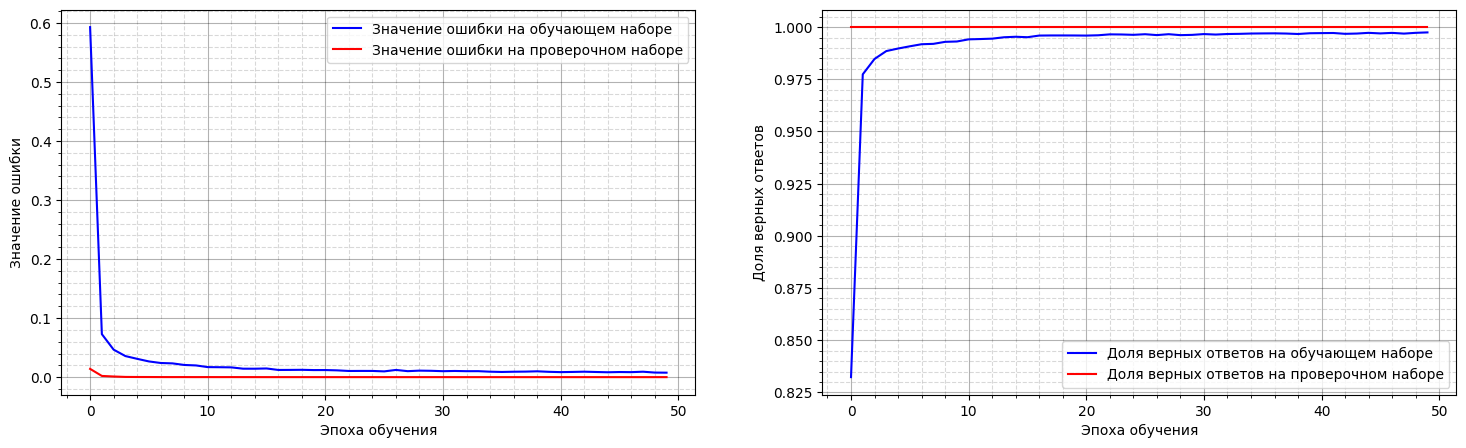

In [105]:
# Отобразим результаты на графике
printNNChart(history1)

# Оценка результатов

In [106]:
# Оценим результат работы нашей сети.
# Применим метод .evaluate() к нашей модели, в качестве параметров
# передадим ему тестовые выборки и согласие на отображение хода вычисления.

scores1 = model1.evaluate(x_test,
                          y_test,
                          verbose=1)

print('Процент верных ответов на тестовых данных:', round(scores1[1],2) * 100, '%')

1556/1556 [==============================] - 1s 903us/step - loss: 1.8483e-06 - accuracy: 1.0000
Процент верных ответов на тестовых данных: 100.0 %


In [107]:
# Вывод значения точности распознавания на проверочной выборке по эпохам
val_acc1 = history1.history['val_accuracy']
i_max = 0
val_acc_max = -1.0
# print(f'Эпохи: {EPOCHS}')
for i in range(EPOCHS):
  # print(f'  {i}->{EPOCHS}: {round(val_acc1[i], 3)}%')
  if val_acc1[i] > val_acc_max:
    val_acc_max = val_acc1[i]
    i_max = i

print(f'Нейронная сеть под номером: {i_max} из {EPOCHS} эпох')
print(f'  достигла точности: {round(val_acc1[i]*100., 3)}%')

Нейронная сеть под номером: 0 из 50 эпох
  достигла точности: 100.0%


# Оценка предсказаний по тестовой выборке

## Оценка по все тестовой выборке

In [108]:
pred1 = model1.predict(x_test)

# У нас 34-класса Заключения:
# Подсчитаем по каждому верное и неверное предсказания
arr_true = np.zeros(len(conclusion_lst), dtype=int)
arr_false = np.zeros(len(conclusion_lst), dtype=int)

for i in range(y_test.shape[0]):
  # Получение индекса самого большого элемента
  # потому что мы имеем дело с one-hot-encoding, поэтому необходимо
  # определить элемент в массиве с максимальным значением,
  # индекс этого элемента и будет говорить о верном элементе
  #~индекс тестового элемента
  y_inx_max = np.argmax(y_test[i,:])
  #~индекс предсказанного элемента
  pred_inx_max = np.argmax(pred1[i,:])
  #~~~
  if y_inx_max == pred_inx_max:
    # верное предсказание
    arr_true[y_inx_max] += 1
  else:
    # неверное предсказания
    arr_false[y_inx_max] += 1

# Результаты предсказаний по тестовой выборке
print(f'Результаты предсказаний по тестовой выборке ({y_test.shape[0]} - записей)')

print('Заключение:')
for i in range(len(conclusion_lst)):
  print(f'  {i}: код: {conclusion_lst[i]}')
  print(f'        верное: {arr_true[i]}')
  print(f'        неверное: {arr_false[i]}')

1556/1556 [==============================] - 1s 800us/step
Результаты предсказаний по тестовой выборке (49766 - записей)
Заключение:
  0: код: 1111
        верное: 9214
        неверное: 0
  1: код: 1113
        верное: 2765
        неверное: 0
  2: код: 1223
        верное: 460
        неверное: 0
  3: код: 2111
        верное: 461
        неверное: 0
  4: код: 2121
        верное: 922
        неверное: 0
  5: код: 2421
        верное: 2764
        неверное: 0
  6: код: 2431
        верное: 461
        неверное: 0
  7: код: 3123
        верное: 922
        неверное: 0
  8: код: 3223
        верное: 921
        неверное: 0
  9: код: 3233
        верное: 460
        неверное: 0
  10: код: 4111
        верное: 5070
        неверное: 0
  11: код: 4224
        верное: 4148
        неверное: 0
  12: код: 4234
        верное: 1383
        неверное: 0
  13: код: 4531
        верное: 1382
        неверное: 0
  14: код: 5224
        верное: 1382
        неверное: 0
  15: код: 5234
        верно

## Оценка предсказаний по 3-й строке тестовой выборки

In [109]:
x_row2 = x_test[2].astype(int).tolist()
print(f'x_row2: length: {len(x_row2)}: {x_row2}')

x_row2: length: 27: [1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]


In [110]:
def getXLstVector(inxHumanRace,inxGender,inxAge,inxSmokingStatus,inxECOG,
                  inxTumorLoad,inxCo_mutationKRAS,inxCo_mutationp53,inxCo_mutationSTK11,
                  inxCo_mutationKEAP1,inxPeriodFromCLT,inxMolecularStatus,
                  inxPD_L1Status,inxPatientPreference):
  '''
  Числовое кодирование X-вектора

  Args:
    inxExpert...inxPatientPreference - числовые индексыиз списка возможных

  Returns:
    массив числовых кодов
  '''

  #~~~~~~~~~~~~~~~~~~~~~~~~
  # print(f'Раса: {inxHumanRace}')
  # print(f'Пол: {inxGender}')
  # print(f'Возраст: {inxAge}')
  # print(f'Статус курения: {inxSmokingStatus}')
  # print(f'ECOG: {inxECOG}')
  # print(f'Есть опухолевая нагрузка? (симптомная опухоль): {inxTumorLoad}')
  # print(f'Ко-мутации KRAS: {inxCo_mutationKRAS}')
  # print(f'Ко-мутации p53.: {inxCo_mutationp53}')
  # print(f'Ко-мутации STK11: {inxCo_mutationSTK11}')
  # print(f'Ко-мутации KEAP1: {inxCo_mutationKEAP1}')
  # print(f'Срок от окончания ХЛТ: {inxPeriodFromCLT}')
  # print(f'Молекулярный статус (только для неплоскоклеточного рака): {inxMolecularStatus}')
  # print(f'PD-L1 статус: {inxPD_L1Status}')
  # print(f'Предпочтение пациента по ответу на терапию: {inxPatientPreference}')

  retVal = []
  #~~~~~~~~~~~~~~~~~~~~~~~~
  #~~~1. Раса: one-hot-encoding
  ohe_arr2 = utils.to_categorical(inxHumanRace, 3)
  ohe_lst2 = ohe_arr2.astype(int).tolist()
  # print(f'ohe_arr2: {ohe_arr2}')
  # print(f'ohe_lst2: {ohe_lst2}')
  retVal.extend(ohe_lst2)
  #~~~2. Пол:
  retVal.append(inxGender)
  #~~~3. Возраст:
  retVal.append(inxAge)
  #~~~4. Статус курения:
  ohe_arr5 = utils.to_categorical(inxSmokingStatus, 3)
  ohe_lst5 = ohe_arr5.astype(int).tolist()
  retVal.extend(ohe_lst5)
  #~~~5. ECOG:
  retVal.append(inxECOG)
  #~~~6. Есть опухолевая нагрузка? (симптомная опухоль):
  retVal.append(inxTumorLoad)
  #~~~7. Ко-мутации KRAS:
  retVal.append(inxCo_mutationKRAS)
  #~~~8. Ко-мутации p53.:
  retVal.append(inxCo_mutationp53)
  #~~~9. Ко-мутации STK11:
  retVal.append(inxCo_mutationSTK11)
  #~~~10. Ко-мутации KEAP1:
  retVal.append(inxCo_mutationKEAP1)
  #~~~11. Срок от окончания ХЛТ:
  ohe_arr12 = utils.to_categorical(inxPeriodFromCLT, 3)
  ohe_lst12 = ohe_arr12.astype(int).tolist()
  retVal.extend(ohe_lst12)
  #~~~12. Молекулярный статус (только для неплоскоклеточного рака):
  ohe_arr13 = utils.to_categorical(inxMolecularStatus, 6)
  ohe_lst13 = ohe_arr13.astype(int).tolist()
  retVal.extend(ohe_lst13)
  #~~~13. PD-L1 статус:
  ohe_arr14 = utils.to_categorical(inxPD_L1Status, 3)
  ohe_lst14 = ohe_arr14.astype(int).tolist()
  retVal.extend(ohe_lst14)
  #~~~14. Предпочтение пациента по ответу на терапию:
  retVal.append(inxPatientPreference)

  #~~~~~~~~~~~~~~~~~~~~~~~~
  del ohe_arr2
  del ohe_lst2
  del ohe_arr5
  del ohe_lst5
  del ohe_arr12
  del ohe_lst12
  del ohe_arr13
  del ohe_lst13
  del ohe_arr14
  del ohe_lst14

  #~~~~~~~~~~~~~~~~~~~~~~~~
  return retVal

In [111]:
#~1. Раса: 0|азиатская
inxHumanRace = 0
#~2. Пол: 0|мужской
inxGender = 0
#~3. Возраст: 0|до 70
inxAge = 0
#~4. Статус курения: 0|в настоящее время
inxSmokingStatus = 0
#~5. ECOG: 0|0-1
inxECOG = 0
#~6. Есть опухолевая нагрузка? (симптомная опухоль): 1|да
inxTumorLoad = 1
#~7. Ко-мутации KRAS: 1|да
inxCo_mutationKRAS = 1
#~8. Ко-мутации p53.: 1|да
inxCo_mutationp53 = 1
#~9. Ко-мутации STK11: 1|да
inxCo_mutationSTK11 = 1
#~10. Ко-мутации KEAP1: 1|да
inxCo_mutationKEAP1 = 1
#~11. Срок от окончания ХЛТ: 2|более 61 дня
inxPeriodFromCLT = 2
#~12. Молекулярный статус (только для неплоскоклеточного рака): 0|нет мутаций
inxMolecularStatus = 0
#~13. PD-L1 статус: 0|не исследовался
inxPD_L1Status = 0
#~14. Предпочтение пациента по ответу на терапию: 0|результативность лечения
inxPatientPreference = 0

x_row_lst = getXLstVector(inxHumanRace,inxGender,inxAge,inxSmokingStatus,inxECOG,
                          inxTumorLoad,inxCo_mutationKRAS,inxCo_mutationp53,inxCo_mutationSTK11,
                          inxCo_mutationKEAP1,inxPeriodFromCLT,inxMolecularStatus,
                          inxPD_L1Status,inxPatientPreference)

print(f'x_row_lst: length: {len(x_row_lst)}: {x_row_lst}')

x_row_lst: length: 27: [1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]


In [112]:
x_row_arr = np.array(x_row_lst, dtype=np.float32).reshape(1, len(x_row_lst))
print(x_row_arr)

[[1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
  0. 0. 0.]]


In [113]:
pred2 = model1.predict(x_row_arr)

1/1 [==============================] - 0s 18ms/step


In [114]:
print(pred2)
print('pred2:')
print(f'  тип: {type(pred2)}')
print(f'  тип данных: {pred2.dtype}')
print(f'  количество осей: {pred2.ndim}')
print(f'  форма массива: {pred2.shape}')
print(f'  количество значений: {pred2.size}')

[[1.32046429e-25 3.42249694e-21 1.30430755e-27 1.08349874e-17
  2.07992616e-11 1.00000000e+00 6.05065376e-09 3.28067941e-20
  3.58861177e-26 1.54589900e-27 4.07985924e-31 0.00000000e+00
  4.06793143e-20 0.00000000e+00 0.00000000e+00 2.68251708e-37
  1.25809353e-18 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.52390848e-36 0.00000000e+00 6.55795848e-24 5.29060677e-35
  1.60890065e-31 7.18598881e-31 1.69623284e-34 2.51049519e-35
  2.94711447e-21 9.43297252e-26 1.28209702e-30 2.47801149e-28
  1.62127567e-34 0.00000000e+00]]
pred2:
  тип: <class 'numpy.ndarray'>
  тип данных: float32
  количество осей: 2
  форма массива: (1, 34)
  количество значений: 34


In [115]:
pred2_inx_max = np.argmax(pred2[0,:])
print(f'pred2_inx_max: {pred2_inx_max}')

pred2_inx_max: 5


In [116]:
def reverse_conclusion(num):
  '''
  Реверсирование кода заключения и перевод чисел в слова

  Args:
    num - числовой код заключения

  Returns:
    список значений
  '''

  retVal = []

  #~~~~~~~~~~~~~~~~~~~~~~~~
  digits = []
  while num > 0:
    digits.append(num % 10)
    num //= 10
  # print(f'digits: len: {len(digits)}: {digits}')

  #~~~~~~~~~~~~~~~~~~~~~~~~
  #~~~15: 'Ответ эксперта (Лактионов)' -> 'Наблюдение'
  retVal.append(getReverseExpertRecommendationCode(digits[0]))
  #~~~ 16 - N1 - 'Поставьте галочку, если уверены на 100%'
  #~~~ 17 - N1 - 'Если 75%'
  #~~~ 18 - N1 - 'Если 50%'
  retVal.append(getReverseConfidence1007550Code(digits[1]))
  #~~~19: 'Альтернатива, если 50% - обязательно' -> 'Дурвалумаб'
  retVal.append(getReverseAlternativeTherapy50Code(digits[2]))
  #~~~20: 'Комментарий' -> 'Нет доказательной базы для назначения после перерыва >61 дня после ХЛТ'
  #~ getCommentCode(elem_str1)
  comment_digit4 = digits[3]
  comment_digit5 = 0
  if 5 == len(digits):
    comment_digit5 = digits[4]
  retVal.append(getReverseCommentCode(comment_digit4, comment_digit5))

  return retVal

In [117]:
conclusion_code = conclusion_lst[pred2_inx_max]
print(f'conclusion_code: {conclusion_code}')

rev_conclusion_lst = reverse_conclusion(conclusion_code)
print(f'rev_conclusion_lst: len: {len(rev_conclusion_lst)}: {rev_conclusion_lst}')

conclusion_code: 2421
rev_conclusion_lst: len: 4: ['наблюдение', 'уверенность 75%', 'Дурвалумаб', 'нет доказательной базы для назначения после перерыва >61 дня после ХЛТ']


# Сохранение модели

In [118]:
# # Подключаем Google Drive
# from google.colab import drive
# print('Google Drive подключен!')

In [119]:
# Определение пути к папке на Google Drive
# model_path = '/content/drive/MyDrive/Stazhirovka2'
# Определение пути к файлу модели
model_path = 'c:/LungCancer_AIConsultant/data_in/model2101/model21010.h5'
print(f"model_path: '{model_path}'")

model_path: 'c:/LungCancer_AIConsultant/data_in/model2101/model21010.h5'


In [120]:
# Сохранение модель в файл на Google Drive
# model1.save("best_model.h5")
model1.save(model_path)